In [1]:
%matplotlib inline

import numpy as np
import sys
from scipy import special, stats
from scipy.optimize import minimize, fminbound
import random
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import pickle
import math

matplotlib.rcParams['figure.figsize'] = (20,10)
matplotlib.rcParams['font.size'] = 22
matplotlib.rcParams['legend.handlelength'] = 2
matplotlib.rcParams['lines.linewidth'] = 3

<div class="alert alert-danger"><b>Ce notebook est à remplir au fur et à mesure du cours et constituera votre rapport sur les trois premières journées de cours. Les questions entourées du symbole $\star$ sont à traiter en dehors du cours.</b></div>

<h1 class="text-center">EISC-211 : Méthodes de Monte-Carlo</h1>

- [I. Calcul du volume d'une sphère par la méthode de Riemann](#RIEMANN)
- [II. Introduction à la méthode de Monte-Carlo : le cas IID](#MC)
- [III. Eléments de simulation stochastique et méthode du rejet](#SIMUSTO)
- [IV. Méthodes de réduction de variance](#IS)
- [V. Introduction aux chaînes de Markov](#INTROMARKOV)
- [VI. Méthodes de Monte-Carlo à base de chaînes de Markov](#MCMC)
- [VII. Chemins auto-évitants](#SAW)

<br>

<br>

<br>

<br>

<br>

<a id="RIEMANN"></a><h1 style="border: 5px solid; text-align: center; padding: 10px"> I. Calcul du volume d'une sphère par la méthode de Riemann</h1>

<div class="alert alert-success" style="text-align: center;">On montre dans cette partie les limitations des techniques d'intégration en grande dimension. L'exemple de l'estimation du volume d'une sphère sera le fil rouge du cours.</div>

Le volume $V_d$ délimité par la sphère de rayon $1$ en dimension $d$ est donné par l'expression suivante:
$$ V_d = \frac{\pi^\frac{d}{2}}{\Gamma(d/2+1)} \mathop{\sim}_{d \to \infty} \frac{1}{\sqrt{\pi d}} \left( \frac{2e\pi}{d} \right)^{d/2}
$$

où $\Gamma$ correspond à la fonction Gamma. Réexprimant $V_d$ sous forme intégrale :
$$ V_d = \int_{[-1,1]^d} f(x) dx \ \text{ avec } \ f(x) = {\bf 1}(\lVert x \rVert \leq 1) $$
on souhaite retrouver la valeur de $V_d$ en estimant l'intégrale ci-dessus à l'aide de sommes de Riemann. Si l'on divise $[-1,1]^d$ en hypercubes de côté $\delta$, on obtient alors l'approximation
$$ \int_{[-1,1]^d} f \approx \widehat V^{\text{R}}_d \ \text{ avec } \ \widehat V^{\text{R}}_d = \sum_{k=1}^N \delta^d f(x_k) = \frac{2^d}{N} \sum_{k=1}^N f(x_k) $$
où les $x_k$ sont les centres des hypercubes et $N  = (2/\delta)^d$ est le nombre d'hypercubes. Puisque $f$ est continue par morceaux, on a bien $\widehat V^{\text{R}}_d \to V_d$ lorsque le nombre $N$ d'hypercubes utilisés tend vers $+\infty$, i.e., lorsque le pas $\delta$ de la discrétisation tend vers $0$.

<div class="alert alert-success">On définit **l'écart relatif** comme la différence entre l'estimateur et sa valeur théorique, normalisée par la valeur théorique :
$$ \text{écart relatif } = \frac{ \widehat V - V }{V} $$
Ici, on connaît la valeur théorique et on peut donc calculer cet écart relatif, mais en pratique la valeur théorique, et donc l'écart relatif, est inconnue.</div>

<p class="bg-primary" style="padding:1em">**QUESTION I.1.** Complétez la fonction `estimation_Riemann` dans le fichier `fonctions_estimation`, puis utilisez le script suivant pour tracer sur une même courbe $\widehat V^{\text{R}}_d$ et sa valeur théorique lorsque $d$ varie entre $2$ et $13$, puis tracez l'évolution de l'écart relatif. Commentez les résultats obtenus et notamment l'influence de $N$ et de la dimension $d$.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION I.1.** 
Pour une valeur inférieure à $10^4$ les résultats sont difficilement exploitables. 
Ensuite, plus on augmente la valeur de N, et plus l'écart relatif reste faible pour une grande dimension :
on observe des écarts "négligeables" entre la théorie et l'estimation pour $dim \leq log_{10}(N)$.
Pour des dimensions plus grandes, l'écart relatif augmente mais en restant inférieur à 1 en valeur absolue. </div>


In [2]:
from fonctions_auxiliaires import grille_Riemann, N_effectif
from fonctions_estimation import estimation_Riemann

In [3]:
N = 10**6
dimensions = range(2,14)
nb_dimensions = len(dimensions)

In [4]:
est_Riemann = np.zeros([nb_dimensions,2])
val_th = np.zeros(nb_dimensions)
for i in range(nb_dimensions):
    dim = dimensions[i]
    grille = grille_Riemann(dim,N)
    print("Estimation par la méthode de Riemann en dimension",dim)
    val_th[i] = (math.pi)**(dim/2)/math.gamma(dim/2 + 1)
    est_Riemann[i,:] = estimation_Riemann(dim,grille)

Estimation par la méthode de Riemann en dimension 2
  - Taille d'echantillon ajustee pour la methode de Riemann: 970299 au lieu de 1000000 (dimension = 3 )
Estimation par la méthode de Riemann en dimension 3
  - Taille d'echantillon ajustee pour la methode de Riemann: 923521 au lieu de 1000000 (dimension = 4 )
Estimation par la méthode de Riemann en dimension 4
  - Taille d'echantillon ajustee pour la methode de Riemann: 759375 au lieu de 1000000 (dimension = 5 )
Estimation par la méthode de Riemann en dimension 5
  - Taille d'echantillon ajustee pour la methode de Riemann: 531441 au lieu de 1000000 (dimension = 6 )
Estimation par la méthode de Riemann en dimension 6
  - Taille d'echantillon ajustee pour la methode de Riemann: 823543 au lieu de 1000000 (dimension = 7 )
Estimation par la méthode de Riemann en dimension 7
  - Taille d'echantillon ajustee pour la methode de Riemann: 390625 au lieu de 1000000 (dimension = 8 )
Estimation par la méthode de Riemann en dimension 8
  - Taille d

Text(0.5,0,'Dimension')

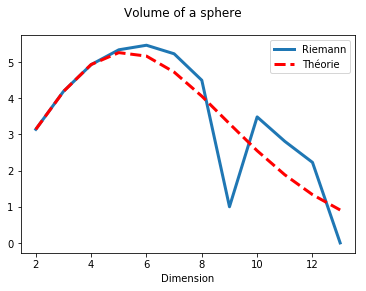

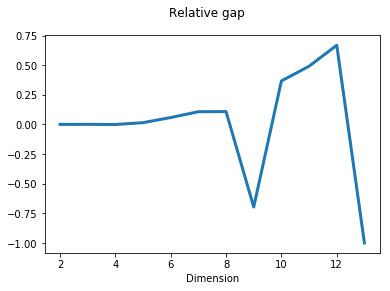

In [5]:
fig =plt.figure()
plt.plot(dimensions, est_Riemann[:,0], label="Riemann")
plt.plot(dimensions, val_th, 'r--', label="Théorie")
plt.legend()
fig.suptitle("Volume of a sphere")
plt.xlabel("Dimension")

fig = plt.figure()
plt.plot(dimensions, est_Riemann[:,1])
fig.suptitle("Relative gap")
plt.xlabel("Dimension")


<p class="bg-primary" style="padding:1em">**QUESTION I.2.** Que calcule le code suivant ? Commentez la courbe obtenue.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION I.2.** 
Le code suivant calcule la vitesse de convergence logarithmique de l'estimation de Riemann pour des dimensions allant de 2 à 13. 
On constate une décroissance globale de la vitesse de convergence lorsque la dimension augmente, mais des irrégularités apparaissent (corrélées aux irrégularités observées sur les courbes ci-dessus). </div>

Text(0.5,0.98,'Vitesse de convergence')

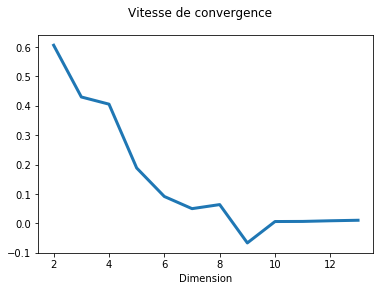

In [6]:
vitesse_R = np.zeros(nb_dimensions)
for i in range(nb_dimensions):
    dim = dimensions[i]
    vitesse_R[i] = -np.log(np.absolute(est_Riemann[i,0] - val_th[i])) / np.log(N_effectif(dim, N))
plt.plot(dimensions, vitesse_R)
plt.xlabel("Dimension")
plt.suptitle("Vitesse de convergence")

On s'intéresse à la robustesse de l'estimation précédente. Pour cela, on considère
$$ \widehat V^{\text{Rc}}_d = \frac{2^d}{N} \sum_{k=1}^N f(c_k) $$
où $c_k$ est le coin de l'hypercube $k$, i.e., $c_k = x_k + \frac{\delta}{2} {\bf 1}$ avec ${\bf 1} = (1, \ldots, 1) \in R^n$.

<p class="bg-primary" style="padding:1em">**QUESTION I.3.** Définissez la fonction `estimation_Riemann_coin` (toujours dans le fichier `fonctions_estimation`) afin qu'elle renvoie l'estimation et l'écart correspondant à cette nouvelle approximation. Rajoutez sur les courbes précédentes les résultats liés à cette estimation et commentez les résultats obtenus.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION I.3.** 
Pour les petites dimensions (typiquement jusque $log_{10}(N)$ ), on observe un écart relatif faible entre la théorie et l'estimation. Mais ici, pour des dimensions plus élevées, l'écart relatif explose (pour atteindre 14 dans le cas $N = 10^5$ et $dim = 12$).</div>

In [7]:
est_Riemann = np.zeros([nb_dimensions,2])
est_Riemann_coin = np.zeros([nb_dimensions,2])

for i in range(nb_dimensions):
    dim = dimensions[i]
    grille = grille_Riemann(dim,N)
    delta=2/N_effectif(dim,N)**(1/dim)
    print("Estimation par la méthode de Riemann en dimension",dim)
    est_Riemann[i,:] = estimation_Riemann(dim,grille)
    est_Riemann_coin[i,:] = estimation_Riemann(dim,grille+delta/2)

Estimation par la méthode de Riemann en dimension 2
  - Taille d'echantillon ajustee pour la methode de Riemann: 970299 au lieu de 1000000 (dimension = 3 )
Estimation par la méthode de Riemann en dimension 3
  - Taille d'echantillon ajustee pour la methode de Riemann: 923521 au lieu de 1000000 (dimension = 4 )
Estimation par la méthode de Riemann en dimension 4
  - Taille d'echantillon ajustee pour la methode de Riemann: 759375 au lieu de 1000000 (dimension = 5 )
Estimation par la méthode de Riemann en dimension 5
  - Taille d'echantillon ajustee pour la methode de Riemann: 531441 au lieu de 1000000 (dimension = 6 )
Estimation par la méthode de Riemann en dimension 6
  - Taille d'echantillon ajustee pour la methode de Riemann: 823543 au lieu de 1000000 (dimension = 7 )
Estimation par la méthode de Riemann en dimension 7
  - Taille d'echantillon ajustee pour la methode de Riemann: 390625 au lieu de 1000000 (dimension = 8 )
Estimation par la méthode de Riemann en dimension 8
  - Taille d

Text(0.5,0.98,'Relative gap')

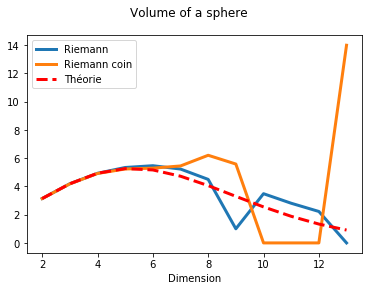

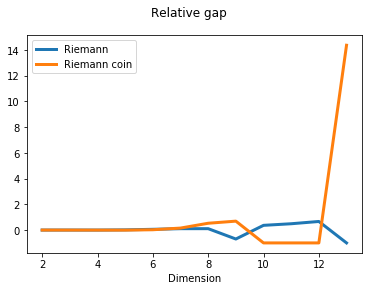

In [8]:
fig = plt.figure()
plt.plot(dimensions, est_Riemann[:,0], label="Riemann")
plt.plot(dimensions, est_Riemann_coin[:,0], label="Riemann coin")
plt.plot(dimensions, val_th, 'r--', label="Théorie")
plt.legend()
plt.xlabel("Dimension")
fig.suptitle("Volume of a sphere")

fig = plt.figure()
plt.plot(dimensions, est_Riemann[:,1], label="Riemann")
plt.plot(dimensions, est_Riemann_coin[:,1], label="Riemann coin")
plt.legend()
plt.xlabel("Dimension")
fig.suptitle("Relative gap")

<p class="bg-primary" style="padding:1em">**QUESTION I.4.** Soit $V^-_d$ le volume de la sphère de rayon $1 - K/d$ en dimension $d$ : montrez théoriquement que $V_d - V^-_d \sim (1-e^{-K}) V_d$ lorsque $d \to \infty$, et utilisez ce résultat pour interpréter les résultats précédents.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION I.4.** 

$$ V_d - V^-_d = \frac{\pi^\frac{d}{2}}{\Gamma(d/2+1)} [ 1^d - (1 - \frac{K}{d})^d ] $$

On utilise le fait que : $(1 - \frac{K}{d})^d \to e^{-K}$ quand $ d \to \infty $

En grande dimension, tout le volume de la sphère se concentre sur le bord, ce qui explique pourquoi l'estimation de Riemann devient mauvaise.

</div>

<p class="bg-primary" style="padding:1em"> **$\star$ QUESTION I.5 $\star$.** Quel bilan tirez-vous de l'estimation d'intégrales par somme de Riemann? </p>

<div class="alert alert-warning">**REPONSE A LA QUESTION I.5.** 

Dès que la dimension du problème augmente suffisamment, l'estimation de Riemann devient instable. On cherche donc une nouvelle façon d'estimer le volume de la sphère. </div>

<br>

<br>

<br>

<br>




<a id="MC"></a><h1 style="border: 5px solid; text-align: center; padding: 10px">II. Introduction à la méthode de Monte-Carlo : le cas IID</h1>

<div class="alert alert-success" style="text-align: center;">On introduit maintenant la méthode de Monte-Carlo sur le même problème d'estimation du volume de la sphére et on discute sa vitesse de convergence.</div>

<div class="alert alert-success">**Rappel**. i.i.d. = indépendantes et identiquement distribuées</div>

<h2>II.1. Méthode de Monte-Carlo</h2>

Soit $(X_k, k \geq 1)$ des variables i.i.d. uniformément réparties sur $[-1,1]^d$ et
$$ \widehat V^{\text{MC}}_d = \frac{2^d}{N} \sum_{k=1}^N f(X_k). $$

<p class="bg-primary" style="padding:1em">**QUESTION II.1.1.** Donnez la densité de $X_1$ et justifiez que $\widehat V^{\text{MC}}_d \to V_d$ lorsque $N \to \infty$.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION II.1.1.** 

$f(X_1) = {\bf 1}(\lVert x \rVert \leq 1)$
<br>
<br>
La loi des grands nombres et l'i.i.d. des variables $ \displaystyle => \widehat V^{\text{MC}}_d \to  2^d * E({\bf 1}(\lVert x \rVert \leq 1)) = 2^d * P(\lVert X_1 \rVert \leq 1) = \int f(x) = V$

</div>
<p class="bg-primary" style="padding:1em">**QUESTION II.1.2.** Complétez la fonction `estimation_IIDMC` afin d'ajouter aux courbes précédentes l'évolution de $\widehat V^{\text{MC}}_d$ ainsi que l'écart relatif correspondant. Commentez les courbes obtenues.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION II.1.2.** 

L'estimation par la méthode de Monte-Carlo est bien meilleure que celle de Riemann pour les dimensions plus grandes (écart relatif non négligeable à partir de $dim = 10$ pour $N = 10^5$) et est tout aussi bonne aux dimensions plus faibles.

</div>

In [9]:
from fonctions_estimation import estimation_IIDMC

In [10]:
est_IIDMC = np.zeros([nb_dimensions,2])
for i in range(nb_dimensions):
    dim = dimensions[i]
    print("Estimation par Monte Carlo en dimension:",dim)
    # pour une comparaison juste, on prend la même taille d'échantillon que pour Riemann
    est_IIDMC[i,:] = estimation_IIDMC(dim,N_effectif(dim,N))[0:2]

Estimation par Monte Carlo en dimension: 2
Estimation par Monte Carlo en dimension: 3
Estimation par Monte Carlo en dimension: 4
Estimation par Monte Carlo en dimension: 5
Estimation par Monte Carlo en dimension: 6
Estimation par Monte Carlo en dimension: 7
Estimation par Monte Carlo en dimension: 8
Estimation par Monte Carlo en dimension: 9
Estimation par Monte Carlo en dimension: 10
Estimation par Monte Carlo en dimension: 11
Estimation par Monte Carlo en dimension: 12
Estimation par Monte Carlo en dimension: 13


Text(0.5,0.98,'Ecart relatif')

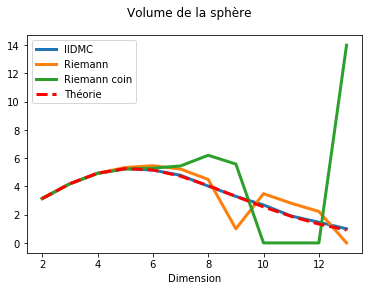

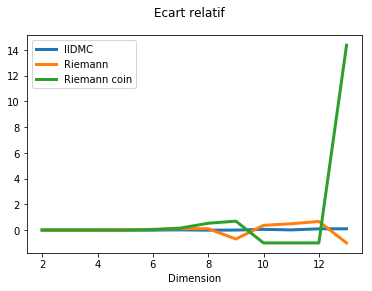

In [11]:
fig = plt.figure()
plt.plot(dimensions, est_IIDMC[:,0], label="IIDMC")
plt.plot(dimensions, est_Riemann[:,0], label="Riemann")
plt.plot(dimensions, est_Riemann_coin[:,0], label="Riemann coin")
th, = plt.plot(dimensions, val_th, 'r--', label="Théorie")
plt.legend()
plt.xlabel("Dimension")
fig.suptitle("Volume de la sphère")

fig = plt.figure()
plt.plot(dimensions, est_IIDMC[:,1], label="IIDMC")
plt.plot(dimensions, est_Riemann[:,1], label="Riemann")
plt.plot(dimensions, est_Riemann_coin[:,1], label="Riemann coin")
plt.legend()
plt.xlabel("Dimension")
fig.suptitle("Ecart relatif")

<p class="bg-primary" style="padding:1em">**QUESTION II.1.3.** Faites tourner le script suivant et commentez les résultats obtenus.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION II.1.3.** 
La vitesse de convergence de la méthode de Monte-Carlo oscille autour d'une valeur à peu près constante (ou diminue avec la dimension, mais plus faiblement que la vitesse de convergence de Riemann) et semble donc indépendante de la dimension. La méthode de Monte-Carlo est de ce fait, aux grandes dimensions, généralement plus rapide que le méthode de Riemann.</div>

Text(0.5,0.98,'Vitesse de convergence')

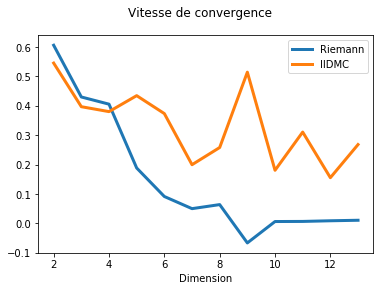

In [12]:
vitesse_IIDMC = np.zeros(nb_dimensions)
for i in range(nb_dimensions):
    dim = dimensions[i]
    vitesse_IIDMC[i] = -np.log(np.absolute(est_IIDMC[i,0] - val_th[i])) / np.log(N_effectif(dim, N))
fig = plt.figure()
plt.plot(dimensions, vitesse_R, label="Riemann")
plt.plot(dimensions, vitesse_IIDMC, label="IIDMC")
plt.legend()
plt.xlabel("Dimension")
fig.suptitle("Vitesse de convergence")

<p class="bg-primary" style="padding:1em">**QUESTION II.1.4.** Quelle est la vitesse de convergence théorique de l'estimateur $\widehat V^{MC}_d$? Cette vitesse dépend-elle de la dimension ? Commentez par rapport aux résultats numériques précédents.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION II.1.4.** 

La vitesse de convergence est indépendante de la dimension, elle est en $\displaystyle \frac{1}{\sqrt{N}}$ par le théorème centrale limite.

</div>


<p class="bg-primary" style="padding:1em">**QUESTION II.1.5.** On fixe la dimension $d = 15$. Répétez l'expérience plusieurs fois : l'estimation donnée par $\widehat V^{\text{MC}}_d$ est-elle stable ? et la vitesse de convergence ? Commentez les résultats obtenus et notamment l'influence de $N$.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION II.1.5.** 

L'estimation oscille autour de la valeur théorique mais les écarts observés entre les valeurs extrêmes de l'estimation sont tout de même importants : les valeurs s'étendent de $\displaystyle \frac{\text{Valeur théorique}}{2}$ à $2 * \text{Valeur théorique}$.
La vitesse de convergence oscille elle aussi autour d'une valeur moyenne qui semble diminuer quand N augmente.

</div>

In [13]:
nb_repet = 50
dim = 15
estim = np.zeros(nb_repet)
vitesse = np.zeros(nb_repet)
val_th = np.zeros(nb_repet) + np.pi**(dim/2) / special.gamma(dim/2+1)
for i in range(nb_repet):
    estim[i] = estimation_IIDMC(dim, N)[0]
    vitesse[i] = -np.log(np.absolute(estim[i] - val_th[i])) / np.log(N)

Text(0.5,0.98,'Estimation et vitesse de convergence en dimension 15')

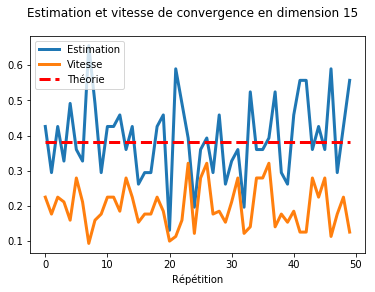

In [14]:
plt.plot(range(nb_repet), estim,label = "Estimation")
plt.plot(range(nb_repet), vitesse,label =  "Vitesse")
plt.plot(range(nb_repet), val_th, 'r--',label =  "Théorie")
plt.xlabel("Répétition")
plt.legend()
plt.suptitle("Estimation et vitesse de convergence en dimension 15")

<h2>II.2. Précision d'un estimateur</h2>

Le but de cette partie est de montrer que la variance n'est toujours pas une mesure satisfaisante pour mesurer la précision d'un estimateur. On considère pour cela la fonction $p(t) = P(\lVert X \rVert \leq t)$ où $X$ est uniformément répartie sur $[-1,1]^d$.


<p class="bg-primary" style="padding:1em">**QUESTION II.2.1** Donnez l'estimateur de Monte-Carlo de $p(t)$, que l'on notera $\widehat p(t)$, ainsi que son espérance et sa variance. En déduire que $\frac{1}{N} (\widehat p(t) - \widehat p(t)^2)$ est un estimateur de la variance de $\widehat p(t)$.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION II.2.1.** 

On a $(X_k, k \geq 1)$ des variables i.i.d. uniformément réparties sur $[-1,1]^d$ on en déduit:
$$ p(t) = {\bf P}(\lVert X \rVert \leq t) $$

$$ p(t) = E({\bf 1}(\lVert X \rVert \leq t))$$
Donc
$$ \widehat p(t) = \frac{1}{N} \sum_{k=1}^N {\bf 1}(\lVert X \rVert \leq t) $$
Puis
$$ E(\widehat p(t)) = \frac{1}{N} \sum_{k=1}^N {\bf P}(\lVert X \rVert \leq t) = \frac{1}{N} N {\bf P}(\lVert X \rVert \leq t)  $$
car les variables sont indépendantes et identiquement distribuées, d'où
$$ E(\widehat p(t)) = {\bf P}(\lVert X \rVert \leq t) $$

On a par ailleurs:
$$ Var(\widehat p(t)) = \frac{1}{N} Var({\bf 1}(\lVert X \rVert \leq t)) $$
$$ Var(\widehat p(t)) = \frac{1}{N} p(t)(1 - p(t)) $$
Donc: 
$$ Var(\widehat p(t)) = E(\frac{1}{N}(\widehat p(t) - \widehat p(t)^2)) $$
</div>

<p class="bg-primary" style="padding:1em">**QUESTION II.2.2.** Complétez le script suivant afin de tracer $t \mapsto \widehat p(t) - \widehat p(t)^2$. Pour quelle valeur de $t$ l'estimateur vous semble-t-il être le moins précis ?</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION II.2.2.** 

Intuitivement, on dirait que l'estimateur est le moins précis là où la variance est la plus grande, id est pour $t = 2.2$. Mais pour $t$ plus petit, on observe que la variance et l'estimateur sont très proches de 0 avec le même ordre de grandeur. Il faut donc s'intéresser au rapport entre la variance et l'estimateur. </div>

Text(0.5,0.98,"Comparaison Variance et Valeur de l'estimateur")

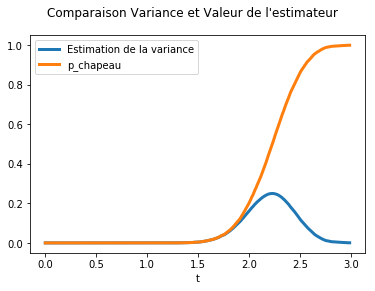

In [15]:
taille_echantillon = 10**4
dim = 15
echantillon = np.random.uniform(-1,1,size = (taille_echantillon,dim))
valeurs_t = np.arange(0,3,.01)
estimation_p = np.zeros((len(valeurs_t),1))
for i in range(len(valeurs_t)):
    estimation_p[i] = 1/taille_echantillon*np.sum(np.linalg.norm(echantillon,2,axis=1) <= valeurs_t[i])
plt.xlabel("t")
plt.plot(valeurs_t, estimation_p - np.power(estimation_p,2), label="Estimation de la variance")
plt.plot(valeurs_t, estimation_p, label= "p_chapeau")

plt.legend()
plt.xlabel("t")
plt.suptitle("Comparaison Variance et Valeur de l'estimateur")

<p class="bg-primary" style="padding:1em">**QUESTION II.2.3.** Justifiez le choix de
$$ \frac{\sqrt{\widehat p(t) - \widehat p(t)^2}}{\widehat p(t)} $$
pour évaluer la précision de $\widehat p(t)$.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION II.2.3.** 

Comme conclu à la question précédente, on s'intéresse au rapport entre la variance et l'estimateur. Le fait de mettre la variance sous une racine permet d'avoir un rapport adimensionné (homogénéité).</div>

<div class="alert alert-success center;">On définit **l'erreur relative** comme le rapport entre l'écart-type de l'estimateur et sa moyenne :
$$ \text{erreur relative } = \frac{\sqrt{\text{Var}(\widehat V)}}{E (\widehat V)} $$
En pratique, ces valeurs sont inconnues mais on peut les estimer par Monte-Carlo.</div>



<p class="bg-primary" style="padding:1em">**QUESTION II.2.4.** Reprenez et complétez le script précédent afin de tracer, sur une autre figure, la courbe $t \mapsto \sqrt{1/\widehat p(t) - 1}$. Pour quelles valeurs de $t$ l'estimateur vous semble-t-il être le moins précis ?</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION II.2.4.** 
Pour les faibles valeurs de $t$, l'erreur relative explose (Python reporte même des divisions par 0) et c'est donc pour les faibles valeurs de t que l'estimateur semble être le moins précis.</div>

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Text(0.5,0.98,'Erreur relative en fonction de t')

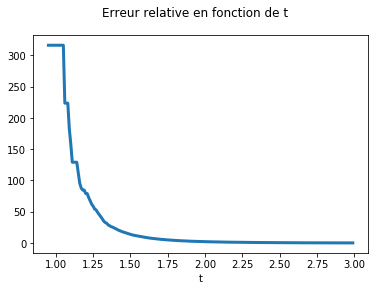

In [16]:
taille_echantillon = 10**5
dim = 15
echantillon = np.random.uniform(-1,1,size = (taille_echantillon,dim))
valeurs_t = np.arange(0,3,.01)
estimation_p = np.zeros((len(valeurs_t),1))
for i in range(len(valeurs_t)):
    estimation_p[i] = 1/taille_echantillon*np.sum(np.linalg.norm(echantillon,2,axis=1) <= valeurs_t[i])

plt.xlabel("t")
plt.plot(valeurs_t, np.power(1/estimation_p - 1,0.5))
plt.suptitle("Erreur relative en fonction de t")

On revient maintenant au cas de la sphère.

<p class="bg-primary" style="padding:1em">**$\star$ QUESTION II.2.5. $\star$** Montrez que dans ce cas, l'erreur relative de l'estimateur de Monte-Carlo est donnée par
$$ \frac{\sqrt{\text{Var}(\widehat V^{\text{MC}}_d)}}{E(\widehat V^{\text{MC}}_d)} = \frac{c_d}{\sqrt N} \ \text{ avec } \ c_d = \sqrt{\frac{2^d}{V_d}-1}. $$</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION II.2.5.** 

$$ \displaystyle E(\widehat V^{\text{MC}}_d) = \frac{2^d}{N}*N*P(\lVert X \rVert \leq 1) = \frac{2^d}{2^d} \int_{[-1,1]^d} f(x) = V_d $$
<br>
<br>
$$ \displaystyle Var(\widehat p) = \frac{2^d}{N}P(\lVert X \rVert \leq 1)(1 - P(\lVert X \rVert \leq 1)) = \frac{V_d}{d}(2^d - V_d) $$

<br>
<br>

$$ \displaystyle => \frac{\sqrt{\text{Var}(\widehat V^{\text{MC}}_d)}}{E(\widehat V^{\text{MC}}_d)} = \frac{1}{\sqrt{N}}(\frac{\sqrt{2^d V_d - V_d^2}}{V_d}) = \frac{1}{\sqrt{N}} \sqrt{\frac{2^d}{V_d} - 1 } $$

</div>

<p class="bg-primary" style="padding:1em">**QUESTION II.2.6.** Modifiez la fonction `estimation_IIDMC` de telle sorte à ce qu'elle calcule également l'erreur relative d'estimation du volume de la sphère. Tracez la courbe correspondante et commentez les résultats obtenus.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION II.2.6.** </div>

In [17]:
from fonctions_estimation import estimation_IIDMC

In [18]:
est_IIDMC = np.zeros([nb_dimensions,3])
val_th = np.zeros(nb_dimensions)
for i in range(nb_dimensions):
    dim = dimensions[i]
    val_th[i] = np.pi**(dim/2) / special.gamma(dim/2+1) 
    print("Estimation par Monte Carlo en dimension:",dim)
    # pour une comparaison juste, on prend la même taille d'échantillon que pour Riemann
    est_IIDMC[i,:] = estimation_IIDMC(dim,N_effectif(dim,N))

Estimation par Monte Carlo en dimension: 2
Estimation par Monte Carlo en dimension: 3
Estimation par Monte Carlo en dimension: 4
Estimation par Monte Carlo en dimension: 5
Estimation par Monte Carlo en dimension: 6
Estimation par Monte Carlo en dimension: 7
Estimation par Monte Carlo en dimension: 8
Estimation par Monte Carlo en dimension: 9
Estimation par Monte Carlo en dimension: 10
Estimation par Monte Carlo en dimension: 11
Estimation par Monte Carlo en dimension: 12
Estimation par Monte Carlo en dimension: 13


Text(0.5,0.98,'Erreur relative')

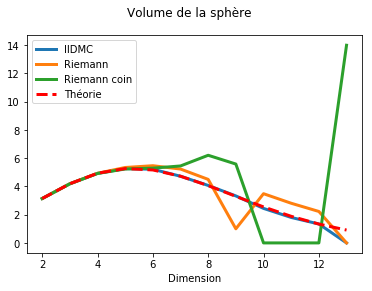

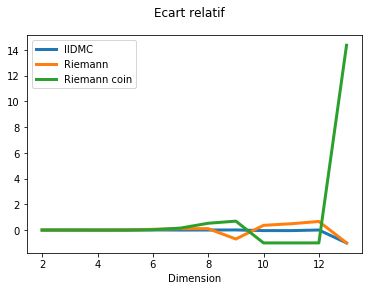

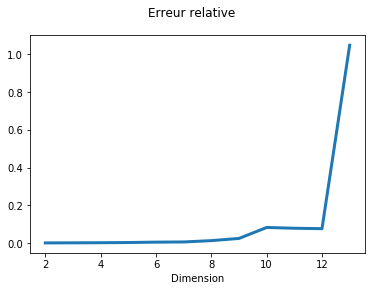

In [19]:
fig = plt.figure()
plt.plot(dimensions, est_IIDMC[:,0], label="IIDMC")
plt.plot(dimensions, est_Riemann[:,0], label="Riemann")
plt.plot(dimensions, est_Riemann_coin[:,0], label="Riemann coin")
plt.plot(dimensions, val_th, 'r--', label="Théorie")
plt.legend()
plt.xlabel("Dimension")
fig.suptitle("Volume de la sphère")

fig = plt.figure()
plt.plot(dimensions, est_IIDMC[:,1], label="IIDMC")
plt.plot(dimensions, est_Riemann[:,1], label="Riemann")
plt.plot(dimensions, est_Riemann_coin[:,1], label="Riemann coin")
plt.legend()
plt.xlabel("Dimension")
fig.suptitle("Ecart relatif")

fig = plt.figure()
errel_IIDMC, = plt.plot(dimensions, est_IIDMC[:,2])
plt.xlabel("Dimension")
fig.suptitle("Erreur relative")

<h2>II.3. Limitations de la méthode IIDMC</h2>


On conclut cette partie par une limitation évidente de la méthode de Monte-Carlo.


<p class="bg-primary" style="padding:1em">**QUESTION II.3.1.** Que vaut $\widehat V^{\text{MC}}_{30}$ pour $N = 10^6$? Faites un calcul d'ordre de grandeur pour déterminer le nombre d'échantillons qu'il faudrait pour avoir une erreur relative $\leq 10^{-2}$.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION II.3.1.** 
Le code renvoie une estimation égale à 0, ce qui indique que le code n'a pas fonctionné correctement. Enfin on trouve un nombre d'échantillons minimal $ N = 5*10^{17} $
</div>

In [20]:
N = 10**6
dim = 30
print(estimation_IIDMC(dim, N))

V30 = (math.pi)**(dim/2)/math.gamma(dim/2 + 1)
N = 10**4*(2**30/V30-1)
print(N)

[0.0, -1.0, 6999.639855271593]
4.899495810350652e+17


<p class="bg-primary" style="padding:1em"> **$\star$ QUESTION II.3.2. $\star$** Quel bilan tirez-vous de l'estimation d'intégrales par méthode de Monte-Carlo? </p>

<div class="alert alert-warning">**REPONSE A LA QUESTION II.3.2.** 

L'estimation d'intégrales par méthode de Monte-Carlo montre de bien meilleurs résultats (précision et rapidité) que la méthode de Riemann pour des dimensions supérieures ou égales à 3, mais rencontre des lacunes (nombre d'échantillons nécessaires trop important) lorsqu'on s'intéresse à des dimensions trop grandes.

</div>

<div class="alert alert-danger"><b>On a illustré ci-dessus la méthode de Monte-Carlo sur l'exemple du calcul de l'intégrale
$$ \int_{[-1,1]^d} \phi(x) d x \ {\bf {\text{ avec }}} \ \phi(x) = {\bf 1}(\lVert x \rVert \leq 1). $$
L'idée a été d'interpréter l'intégrale comme une espérance et d'utiliser la loi forte des grands nombres pour approcher cette espérance. Cette idée se généralise aisément au calcul de l'intégrale
$$ \int \phi(x) f(x) d x $$
où $f$ est une densité, en réécrivant cette intégrale comme l'espérance de la variable aléatoire $\phi(X)$ où $X$ est de densité $f$. Par ailleurs, contrairement au cas déterministe, la vitesse de convergence de cette méthode est indépendante de la dimension du problème!</b></div>



In [4]:
%matplotlib inline

import numpy as np
import sys
from scipy import special, stats, integrate
from scipy.optimize import minimize, fminbound
import random
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import pickle
import math

matplotlib.rcParams['figure.figsize'] = (15,10)
matplotlib.rcParams['font.size'] = 22
matplotlib.rcParams['legend.handlelength'] = 2
matplotlib.rcParams['lines.linewidth'] = 3

<div class="alert alert-danger"><b>Ce notebook est à remplir au fur et à mesure du cours et constituera votre rapport sur les trois premières journées de cours. Les questions entourées du symbole $\star$ sont à traiter en dehors du cours.</b></div>

<h1 class="text-center">EISC-211 : Méthodes de Monte-Carlo</h1>

- [I. Calcul du volume d'une sphère par la méthode de Riemann](#RIEMANN)
- [II. Introduction à la méthode de Monte-Carlo : le cas IID](#MC)
- [III. Eléments de simulation stochastique et méthode du rejet](#SIMUSTO)
- [IV. Méthodes de réduction de variance](#IS)
- [V. Introduction aux chaînes de Markov](#INTROMARKOV)
- [VI. Méthodes de Monte-Carlo à base de chaînes de Markov](#MCMC)
- [VII. Chemins auto-évitants](#SAW)

<br>

<br>

<br>

<br>

<br>



<a id="SIMUSTO"></a><h1 style="border: 5px solid; text-align: center; padding: 10px"> III. Eléments de simulation stochastique et méthode du rejet</h1>


<div class="alert alert-success"> On présente ici des éléments de simulation stochastique. On discute d'abord de méthodes pour vérifier qu'une variable aléatoire suit une loi donnée, puis on présente la méthode du rejet, qui permet de générer une variable aléatoire avec une loi donnée. Une autre méthode classique et très importante est la méthode de la fonction de répartition inverse qui fait l'objet du DM.</div>


<div class="alert alert-success">Nous verrons dans la suite du cours que la méthode du rejet est à la base de la technique d'échantillonnage préférentiel et des méthodes de Monte-Carlo à base de chaînes de Markov.</div>


<div class="alert alert-success">**Rappel**. La fonction de répartition d'une variable aléatoire $X$, notée $F_X$, est la fonction $F_X(x) = P(X \leq x)$.</div>



<h2> III.1. Histogramme et densité </h2>

Soit $X$ une variable aléatoire absolument continue que l'on sait générer mais dont on ne connaît pas la densité. Pour vérifier qu'une densité candidate $g$ est proche de la vraie densité, une manière très visuelle est de générer un échantillon $(X_1, X_2, \ldots)$ de variables i.i.d. distribuées comme $X$ et de comparer un histogramme associé à cet échantillon à $g$.

<p class="bg-primary" style="padding:1em">**QUESTION III.1.1.** Soit $(Y_k)$ i.i.d. qui suivent une loi exponentielle de paramètre $1/2$. Le théorème central limite prédit que
$$ X = \sum_{k=1}^{100} Y_k $$
suit approximativement une loi normale : quels sont les paramètres de cette loi ?</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION III.1.1.** 

$$ \mu = E(X) = n * E(Y) = \frac{n}{\lambda} = 200 $$

$$ \sigma^2 = Var(X) = n * Var(Y) = \frac{n}{\lambda^2} = 400 $$

</div>

<p class="bg-primary" style="padding:1em">**QUESTION III.1.2.** Vérifiez votre réponse en complétant le script suivant, et commentez les résultats obtenus.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION III.1.2.** 

On observe une concordance entre le "contour" de l'histogramme et la loi normale dont on a estimé les paramètres. C'est une belle illustration du théorème central limite.</div>

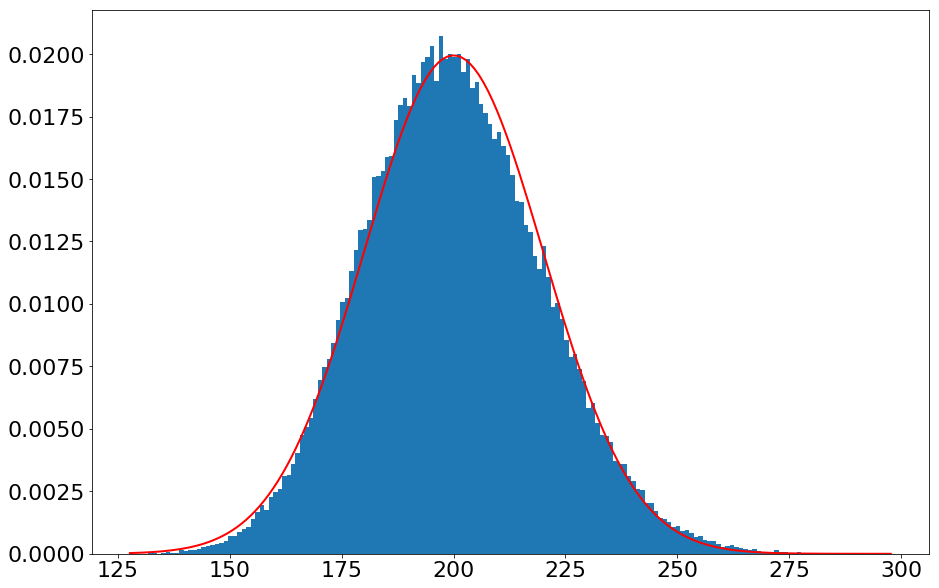

In [5]:
taille_echantillon = 10**5
nb_termes = 100
parametre_exp = .5
echantillon = np.zeros(taille_echantillon)
for i in range (nb_termes) :
    echantillon += np.random.exponential(1/parametre_exp,size = taille_echantillon)
count, bins, ignored = plt.hist(echantillon, np.arange(np.min(echantillon)-0.5, np.max(echantillon)+1.5), normed=True)
mu = 200
sigma = 20
plt.plot(bins, stats.norm.pdf(bins, loc=mu, scale=sigma), linewidth=2, color='r')

<p class="bg-primary" style="padding:1em">**QUESTION III.1.3.** Discutez des limitations potentielles de cette méthode.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION III.1.3.** 

Ici on s'est contenté de générer 100 variables aléatoires, mais on imagine que pour obtenir une approximation satisfaisante il faut énormément augmenter le nombre de termes, ce qui peut poser des problèmes de temps et de mémoire.
</div>
<h2> III.2. Fonction de répartition empirique </h2>

Nous présentons maintenant une méthode plus rigoureuse. On considère un échantillon $(X_1, X_2, \ldots)$ de variables i.i.d. distribuées comme $X$ à valeurs dans $R$ et on s'intéresse à la fonction
$$ \widehat F_N: x \in R \mapsto \frac{1}{N} \sum_{k=1}^N {\bf 1}(X_k \leq x). $$


<p class="bg-primary" style="padding:1em">**QUESTION III.2.1.** Montrez que $\widehat F_N(x) \to F_X(x)$ pour tout $x \in R$ fixé.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION III.2.1.** 

On utilise la loi des grands nombres :

$$ \frac{1}{N} \sum_{k=1}^N {\bf 1}(X_k \leq x) \to E({\bf 1}(X_k \leq x)) = P(X_1 \leq x) = F_X(x) $$


Ce résultat justifie donc d'appeler $\widehat F_N$ **fonction de répartition empirique** de $X$. Pour vérifier qu'une variable aléatoire suit une loi de fonction de répartition $F$, on peut donc superposer $\widehat F_N$ et $F$ et accepter que $F = F_X$ si les deux courbes sont proches pour $n$ suffisamment grands.
</div>
<p class="bg-primary" style="padding:1em">**QUESTION III.2.2.** Complétez le script suivant pour vérifier que les fonctions ``stats.expon.rvs``, ``stats.gamma.rvs``, ``stats.uniform.rvs`` et ``stats.expon.rvs`` renvoient bien des variables aléatoires qui suivent la loi uniforme, la loi exponentielle, la loi de Poisson et la loi gamma, respectivement. Utilisez pour cela la fonction ``ecdf``. A partir de quelle taille d'échantillon les approximations vous semblent-elles valides ?</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION III.2.2.** 
A partir d'un échantillon de taille 1000 on observe déjà de très bons résultats (superposition des courbes quasiment parfaite).</div>

In [6]:
def ecdf(echantillon):
    """
    Cette fonction prend en entrée un échantillon
    et renvoie le couple (sorted_, yvals) qui est tel que
    np.step(sorted_, yvals) trace la fonction de répartition empirique
    """
    sorted_ = np.sort(echantillon)
    yvals = np.arange(len(sorted_))/float(len(sorted_))
    sorted_ = np.append(sorted_, np.amax(echantillon))
    sorted_ = np.append(sorted_, np.amax(echantillon)+1)
    sorted_ = np.insert(sorted_, 0, np.amin(echantillon)-1)
    yvals = np.append(yvals, 1)
    yvals = np.append(yvals, 1)
    yvals = np.insert(yvals, 0, 0)
    return (sorted_, yvals)

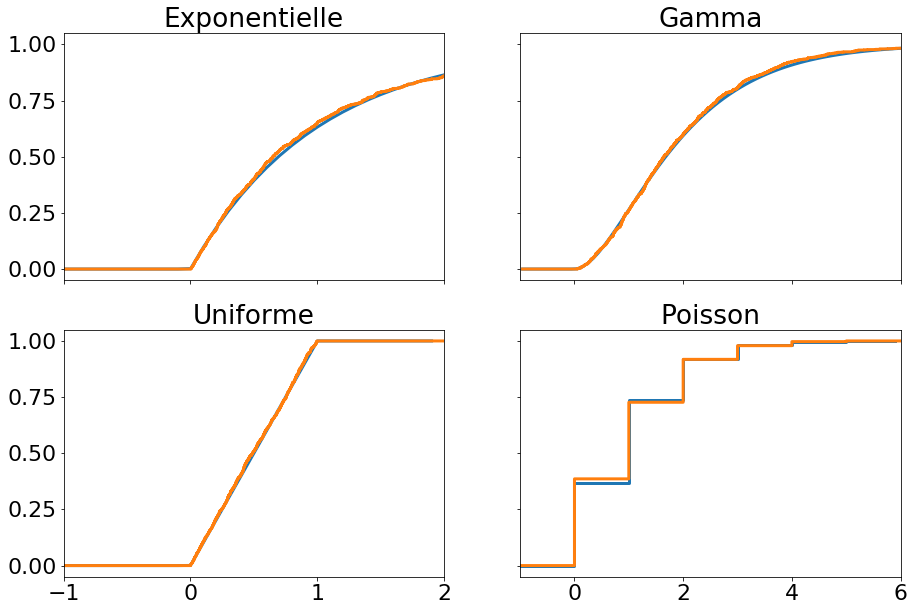

In [7]:
taille = 10**3
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')

t = ["Exponentielle", "Gamma", "Uniforme", "Poisson"]
for i in range(4):
    if i==0: # exponentielle
        echantillon = stats.expon.rvs(loc=0, scale=1, size=taille)
        x = np.arange(np.min(echantillon)-1, np.max(echantillon)+1, .1)
        a = ax1
        a.plot(x, stats.expon.cdf(x, loc=0, scale=1))
    if i==1: # gamma
        echantillon = stats.gamma.rvs(2, loc=0, scale=1, size=taille, random_state=None)
        x = np.arange(np.min(echantillon)-1, np.max(echantillon)+1, .1)
        a = ax2
        a.plot(x, stats.gamma.cdf(x, a=2, loc=0, scale=1))
    if i==2: # uniforme
        echantillon = stats.uniform.rvs(loc=0, scale=1, size=taille, random_state=None)
        x = np.arange(np.min(echantillon)-1, np.max(echantillon)+1, .1)
        a = ax3
        a.plot(x, stats.uniform.cdf(x, loc=0, scale=1))
    if i==3: # poisson
        echantillon = stats.poisson.rvs(1, loc=0, size=taille, random_state=None)
        x = np.arange(np.min(echantillon)-1, np.max(echantillon)+1, .1)
        a = ax4
        a.step(x, stats.poisson.cdf(x, mu=1))
    s, y = ecdf(echantillon)
    a.step(s, y)
    a.set_title(t[i])
    a.set_xlim([np.min(echantillon)-1, np.max(echantillon)+1])

<p class="bg-primary" style="padding:1em">**QUESTION III.2.3.** Soient $U_1$, $U_2$ indépendantes et uniformément réparties sur $[0,1]$ et $Z = \sqrt{- 2 \ln U_1} \cos(2 \pi U_2)$. Vous pouvez générer au plus 200 variables aléatoires. Parmi les choix suivants, quelle est selon vous la loi de $Z$?
<br>

&#9679; Cauchy, i.e., $f_Z(z) \propto 1/(1+z^2)$ (cf. ``stats.cauchy``)

<br>

&#9679; Laplace, i.e., $f_Z(z) \propto e^{-\lvert z \rvert}$ (cf. ``stats.laplace``)

<br>

&#9679; Gauss, i.e., $f_Z(z) \propto e^{-z^2/2}$ (cf. ``stats.norm``)</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION III.2.3.**
D'après les courbes, il semble que notre échantillon suive une loi normale.</div>

Text(0.5,0.98,'Comparaison échantillon - lois')

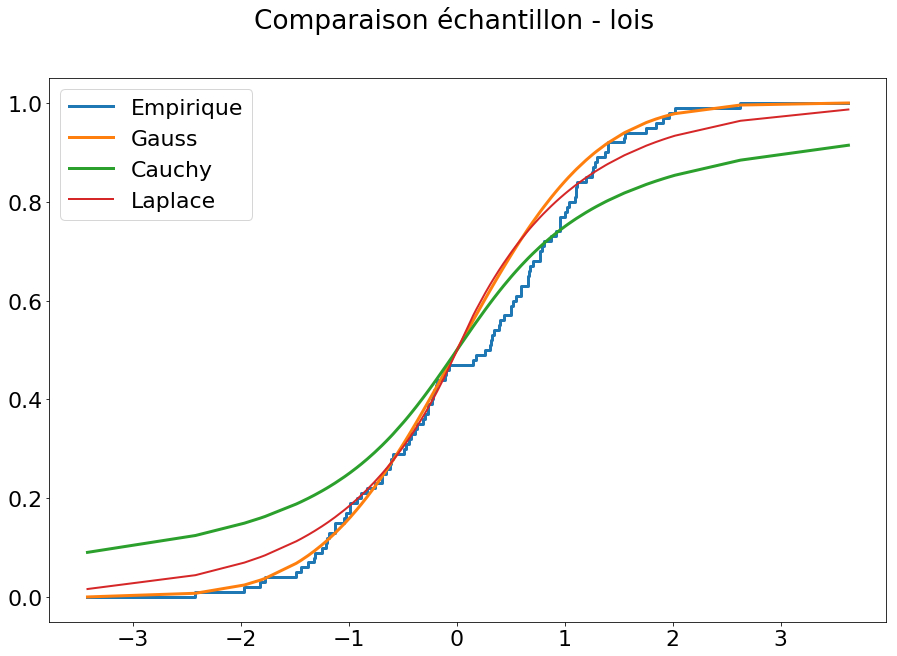

In [8]:
taille_echantillon = 100
u1 = stats.uniform.rvs(loc=0, scale=1, size=taille_echantillon, random_state=None)
u2 = stats.uniform.rvs(loc=0, scale=1, size=taille_echantillon, random_state=None)
z = np.power(-2*np.log(u1),0.5)*np.cos(2*np.pi*u2)
s,y = ecdf(z)
plt.step(s,y, label="Empirique")
plt.plot(s, stats.norm.cdf(s,loc=0,scale=1), label="Gauss")
plt.plot(s, stats.cauchy.cdf(s,loc=0,scale=1), label="Cauchy")
plt.plot(s, stats.laplace.cdf(s,loc=0,scale=1), linewidth=2, label="Laplace")
         
plt.legend()
plt.suptitle("Comparaison échantillon - lois")

Jusqu'à présent, la méthode proposée n'est pas beaucoup plus rigoureuse que l'utilisation des histogrammes, à la différence qu'il n'y a pas besoin de faire de choix pour les urnes. Un autre avantage est que la vitesse de convergence $\widehat F_N \to F_X$ peut être quantifiée comme on le voit maintenant.

<p class="bg-primary" style="padding:1em">**$\star$ QUESTION III.2.4. $\star$** Quel résultat contrôle les fluctuations de $\widehat F_N(x)$ autour de $F_X(x)$? Montrez que
$$ P \left( \widehat F_N(x) - \varepsilon_N(x) \leq F_X(x) \leq \widehat F_N(x) + \varepsilon_N(x) \right) \mathop{\longrightarrow}_{n \to \infty} 0{,}95 \ \text{ où } \ \varepsilon_N(x) = \frac{\sigma(x) F^{-1}(0{,}975)}{\sqrt N} $$
avec $\sigma(x)^2 = F_X(x) (1-F_X(x))$, $F$ la fonction de répartition de la loi normale centrée réduite et $F^{-1}$ son inverse.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION III.2.4.** </div>


<p class="bg-primary" style="padding:1em">**$\star$ QUESTION III.2.5. $\star$** Quel est le problème de la fonction $\varepsilon_N$? Proposez une fonction $\widehat \varepsilon_N$ sans ce problème et qui satisfait aussi
$$ P \left( \widehat F_N(x) - \widehat \varepsilon_N(x) \leq F_X(x) \leq \widehat F_N(x) + \widehat \varepsilon_N(x) \right) \mathop{\longrightarrow}_{n \to \infty} 0{,}95. $$</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION III.2.5.** </div>



On remarquera en particulier que $[\widehat F_N(x) - \widehat \varepsilon_N(x), \widehat F_N(x) + \widehat \varepsilon_N(x)]$ est l'**intervalle de confiance bilatéral symétrique** de $F_X(x)$ au niveau asymptotique $95\%$.

<p class="bg-primary" style="padding:1em">**$\star$ QUESTION III.2.6. $\star$** Reprenez et complétez le script précédent pour ajouter les deux enveloppes $\widehat F_{100} \pm \widehat \varepsilon_{100}$. Utilisez pour cela les fonctions ``np.std`` et ``stats.norm.ppf``.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION III.2.6.** </div>

In [9]:
taille = 10**3
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')

t = ["Exponentielle", "Gamma", "Uniforme", "Poisson"]
for i in range(4):
    if i==0:
        echantillon = stats.expon.rvs(loc=0, scale=1, size=taille)
        x = np.arange(np.min(echantillon)-1, np.max(echantillon)+1, .1)
        a = ax1
        a.plot(x, stats.expon.cdf(x, loc=0, scale=1))
    if i==1:
        echantillon = stats.gamma.rvs(a=2, loc=0, scale=1, size=taille)
        x = np.arange(np.min(echantillon)-1, np.max(echantillon)+1, .1)
        a = ax2
        a.plot(x, stats.gamma.cdf(x, a=2, loc=0, scale=1))
    if i==2:
        echantillon = stats.uniform.rvs(loc=0, scale=1, size=taille)
        x = np.arange(np.min(echantillon)-1, np.max(echantillon)+1, .1)
        a = ax3
        a.plot(x, stats.uniform.cdf(x, loc=0, scale=1))
    if i==3:
        echantillon = stats.poisson.rvs(mu=1, size=taille)
        x = np.arange(np.min(echantillon)-1, np.max(echantillon)+1, .1)
        a = ax4
        a.step(x, stats.poisson.cdf(x, mu=1))
    s, y = ecdf(echantillon)
    a.step(s, y)
    a.set_title(t[i])
    epsilon = # TO DO
    a.step(s,y + epsilon, 'g', linewidth=1.0)
    a.step(s,y - epsilon, 'g', linewidth=1.0)
    a.set_xlim([np.min(echantillon)-1, np.max(echantillon)+1])
    

SyntaxError: invalid syntax (<ipython-input-9-1b19d45e11ec>, line 29)

<h2> III.3. Méthode du rejet </h2>

Soit $Y$ une variable aléatoire absolument continue admettant pour densité $f$ satisfaisant $f(x) = 0$ si $\lvert x \rvert \geq 1$ et $\sup f < \infty$. On génère itérativement des points uniformément répartis sur $[-1,1] \times [0,K]$ avec $K \geq 2\sup f$ jusqu'à avoir généré un point sous la courbe $f$. Sur la figure ci-dessous, on a généré les quatre croix avant de générer le point noir.

![title](rejet.png)



On considère alors l'abscisse du premier point sous la courbe, que l'on note $Z$. Dans le premier devoir maison, on vous demande de démontrer que
$$ \tag{1} P(Z \leq z) = P(X \leq z \mid U \leq f(X)), \ z \in R, $$
avec $(X, U)$ uniformément réparti sur $[-1,1] \times [0,K]$.

<p class="bg-primary" style="padding:1em">**QUESTION III.3.1.** Donnez la densité de $(X, U)$ et déduisez de (1) que $Z$ admet $f$ pour densité.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION III.3.1.** 
 X et U sont indépendants car le domaine de la loi jointe est un rectangle donc :
 
 
 $$ f_{X,U}(x,u) = f_X(x)*f_U(u) = \frac{1}{2K} * {\bf 1}(-1 \leq x \leq 1 , 0 \leq u \leq K ) 
 = \frac{1}{2}*{\bf 1}(-1 \leq x \leq 1)*\frac{1}{K}*{\bf 1}(0 \leq u \leq K)  $$
 

 
</div>


<p class="bg-primary" style="padding:1em">**QUESTION III.3.2.** Quelle est la loi du nombre de points rejetés avant d'en accepter un ? En déduire le nombre moyen de simulations nécessaires afin de simuler $Y$ selon cette méthode.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION III.3.2.** 
La loi du nombre de points générés avant un succès suit une loi géométrique, de paramètre "avoir un succès" soit : 
$$ P(U \leq f(X)) = \frac{1}{2K} $$

Le nombre moyen de simulations nécessaires est donc $ 2K $
</div>




<p class="bg-primary" style="padding:1em">**QUESTION III.3.3.** Ecrivez un script qui implante cette méthode dans le cas où $f$ est la densité normale tronquée, i.e.,
$$ f(x) \propto \exp\left( -\frac{x^2}{2} \right)*{\bf 1}(-1 \leq x \leq 1) . $$
Vous vérifierez bien que la sortie de votre script admet la bonne loi.

<div class="alert alert-warning">**REPONSE A LA QUESTION III.3.3.** </div>

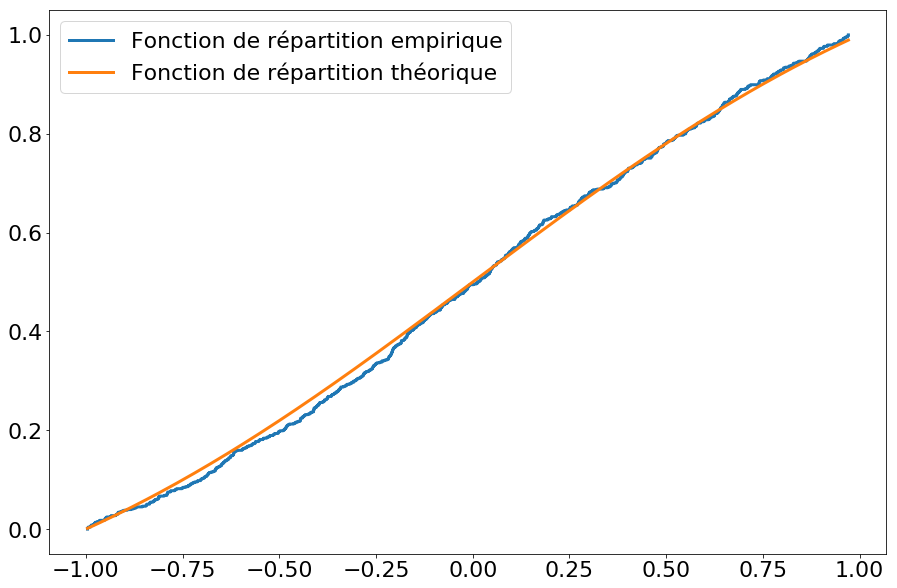

In [10]:
taille_echantillon = 10**3

K = 2/(np.sqrt(2*np.pi)*(stats.norm.cdf(1)-stats.norm.cdf(-1)))

x = np.random.uniform(-1,1, taille_echantillon)
u = np.random.uniform(0,K, taille_echantillon)

echantillon = x[u-np.exp(-np.power(x,2)/2)<0]

s, y = ecdf(echantillon)
s = s[1:-1]
y = y[1:-1]
plt.step(s, y, label="Fonction de répartition empirique")
plt.plot(s, (stats.norm.cdf(s) - stats.norm.cdf(-1))*np.sqrt(2*np.pi)*K/2, label= "Fonction de répartition théorique")
plt.legend()

<p class="bg-primary" style="padding:1em">**QUESTION III.3.4.** A l'aide de la méthode du rejet, écrivez un code qui permet de générer une variable aléatoire de densité $\displaystyle f(x) \propto \lvert x \rvert \exp(\lvert x \rvert^\pi) {\bf 1}(\lvert x \rvert < 1)$.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION III.3.4.** </div>

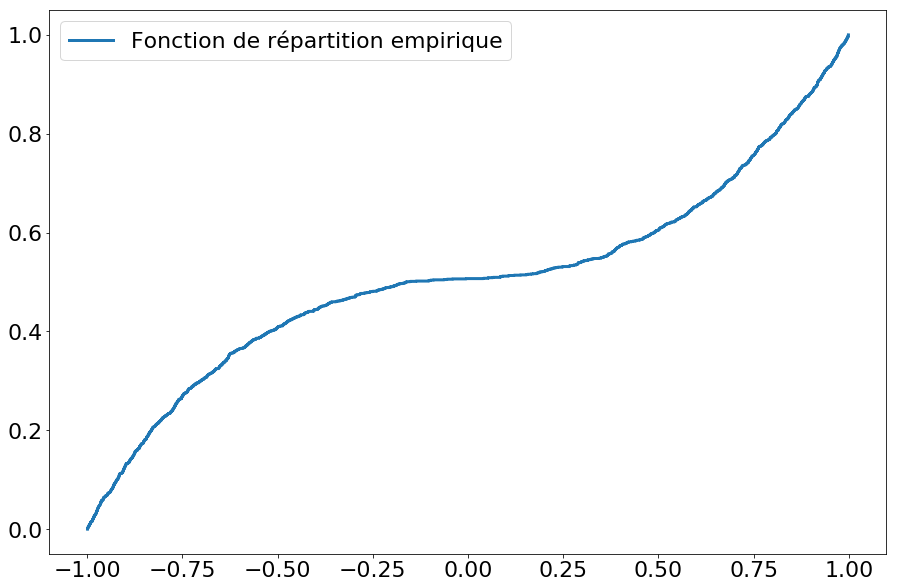

In [11]:
taille_echantillon = 10**4

func = lambda x: x*np.exp(x**np.pi)

const = 2*integrate.quad(func,0,1)[0]

K = 6/const

x = np.random.uniform(-1,1, taille_echantillon)
u = np.random.uniform(0,K, taille_echantillon)

echantillon = x[u-abs(x)*np.exp(np.power(abs(x),np.pi)/2)<0]

s, y = ecdf(echantillon)
s = s[1:-1]
y = y[1:-1]
plt.step(s, y, label="Fonction de répartition empirique")
plt.legend()



In [1]:
%matplotlib inline

import numpy as np
import sys
from scipy import special, stats
from scipy.optimize import minimize, fminbound
import random
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import pickle

matplotlib.rcParams['figure.figsize'] = (10,10)
matplotlib.rcParams['font.size'] = 22
matplotlib.rcParams['legend.handlelength'] = 2
matplotlib.rcParams['lines.linewidth'] = 3

<div class="alert alert-danger"><b>Ce notebook est à remplir au fur et à mesure du cours et constituera votre rapport sur les trois premières journées de cours. Les questions entourées du symbole $\star$ sont à traiter en dehors du cours.</b></div>

<h1 class="text-center">EISC-211 : Méthodes de Monte-Carlo</h1>

- [I. Calcul du volume d'une sphère par la méthode de Riemann](#RIEMANN)
- [II. Introduction à la méthode de Monte-Carlo : le cas IID](#MC)
- [III. Eléments de simulation stochastique et méthode du rejet](#SIMUSTO)
- [IV. Méthodes de réduction de variance](#IS)
- [V. Introduction aux chaînes de Markov](#INTROMARKOV)
- [VI. Méthodes de Monte-Carlo à base de chaînes de Markov](#MCMC)
- [VII. Chemins auto-évitants](#SAW)







<a id="IS"></a><h1 style="border: 5px solid; text-align: center; padding: 10px">IV. Méthodes de réduction de variance</h1>


<div class="alert alert-success"> Pour améliorer l'estimation de $I = \int \phi f$, l'idée des méthodes de réduction de variance (aussi appelées échantillonnage préférentiel) est d'utiliser une représentation différente de l'intégrale :
$$ I = \int \phi f = \int \widetilde{\phi} g \ \text{ avec } \widetilde \phi = \frac{\phi f}{g} $$
puis d'utiliser l'estimateur IIDMC
$$ \frac{1}{N} \sum_{k=1}^N \widetilde \phi(Y_k) $$
où les $(Y_k)$ sont i.i.d. de densité $g$. Vous verrez dans le DM2 que cette méthode a des liens profonds avec la méthode du rejet.</div>

<h2> IV.1. Exemple de la loi de Cauchy </h2>

On cherche dans cette partie à estimer la probabilité $p=P(X>2)$ où $X$ suit une loi de Cauchy, i.e., $X$ est une variable aléatoire absolument continue de densité
$$ f(x) = \frac{1}{\pi (1+x^2)}, \ x \in R. $$
Pour cela, on va considérer $4$ estimateurs de Monte-Carlo:
$$ \widehat p^i_N = \frac{1}{N} \sum_{k=1}^N Y^i_k $$
où pour chaque $i=1,\dots,4$ les $(Y^i_k, k \in N)$ sont i.i.d.. Ces 4 estimateurs correspondent aux différentes écritures suivantes de $p$ :
\begin{align*}
p & = \int {\bf 1}(x > 2)  f(x) d x \tag{1}\\
& = \frac{1}{2} \int  {\bf 1}(\lvert x \rvert > 2) f(x) d x \tag{2}\\
& = \frac{1}{2} - \int  f(x){\bf 1}(0 \leq x \leq 2) d x \tag{3}\\
& = \int_0^{1/2} \frac{y^{-2}}{\pi (1 + y^{-2})} d y\tag{4}
\end{align*}
(1) vient de la définition de $p$, (2) de la parité de $f$, (3) du fait que $f$ s'intègre à $1$ et est paire, et (4) vient de (1) et du changement de variable $y = 1/x$.


<p class="bg-primary" style="padding:1em">**QUESTION IV.1.1.** Justifiez que le meilleur estimateur soit celui qui corresponde à la variable aléatoire $Y^i_1$ de variance minimale.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION IV.1.1.** 

On dipose d'estimateurs sans biais. Afin d'obtenir le "meilleur", on cherche à présent le plus précis, id est celui de variance minimale.

</div>



<p class="bg-primary" style="padding:1em">**QUESTION IV.1.2.** $\widehat p^1$ correspond à l'estimateur naïf de Monte-Carlo : écrivez $Y^1_1 = \varphi_1(X)$ et estimez numériquement $\text{Var}(Y^1_1)$ dans ce cas.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION IV.1.2.** </div>

In [2]:
taille_echantillon = 10**3
x = np.random.standard_cauchy(size=taille_echantillon)
y = [] 
for i in range(len(x)):
    if((x[i]) > 2):
        y.append(1)
    else:
        y.append(0)
estimation = 0
for i in range(len(y)):
    estimation += y[i]
estimation = estimation/taille_echantillon

variance = np.var(y)/taille_echantillon

print("Estimation:",estimation)

print("Variance de l'estimateur:",variance)


Estimation: 0.145
Variance de l'estimateur: 0.00012397499999999996


<p class="bg-primary" style="padding:1em">**QUESTION IV.1.3.** Utilisez la représentation (2) pour construire $Y^2_1 = \varphi_2(\lvert X \rvert)$. Estimez numériquement $\text{Var}(Y^2_1)$ dans ce cas et justifiez théoriquement la réduction de variance.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION IV.1.3.** 

On constate que la fonction de densité de la loi de Cauchy est symétrique: la valeur de son intégrale sur $[2 ; +\infty[$ est donc égale à celle sur $]-\infty ; -2]$. On peut alors écrire:

$$ \displaystyle p =\int \frac{{\bf 1}(|x|>2)}{2}f(x)dx $$
On a donc : $ \displaystyle Y_1^2 = \varphi_2(|X|)= \frac{{\bf 1}(|X_i|>2)}{2}$
</div>

</div>

In [3]:
x = np.random.standard_cauchy(size=taille_echantillon)
y = []
for i in range(len(x)):
    if(abs(x[i]) > 2):
        y.append(0.5)
    else:
        y.append(0)
estimation = 0
for i in range(len(y)):
    estimation += y[i]
estimation = estimation/taille_echantillon

variance = np.var(y)/taille_echantillon

print("Estimation:",estimation)
print("Variance de l'estimateur:",variance)


Estimation: 0.1485
Variance de l'estimateur: 5.219775000000001e-05


<p class="bg-primary" style="padding:1em">**QUESTION IV.1.4.** Utilisez la représentation (3) pour construire $Y^3_1 = \varphi_3(U)$ où $U$ est uniformément répartie, et estimez numériquement $\text{Var}(Y^3_1)$ dans ce cas.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION IV.1.4.** </div>

In [4]:
u = np.random.uniform(0,2,size=taille_echantillon)
y = []
for i in range(len(u)):
    x = u[i]
    y.append(np.power(np.pi*(1+x**2),-1))
sum = 0
for i in range(len(y)):
    sum += y[i]
sum = sum/taille_echantillon

estimation = 0.5 - 2*sum

variance = np.var(y)*4/taille_echantillon
print("Estimation:",estimation)
print("Variance de l'estimateur:",variance)


Estimation: 0.1514517134925238
Variance de l'estimateur: 2.8931356701003076e-05


<p class="bg-primary" style="padding:1em">**QUESTION IV.1.5.** Utilisez la représentation (4) pour construire $Y^4_1 = \varphi_4(U)$ où $U$ est uniformément répartie, et estimez numériquement $\text{Var}(Y^4_1)$ dans ce cas.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION IV.1.5.** </div>

In [5]:
u = np.random.uniform(0,0.5,size=taille_echantillon)
y = []
for i in range(len(u)):
    x = u[i]
    y.append(x**(-2)/(np.pi*(1+x**(-2))))
sum = 0
for i in range(len(y)):
    sum += y[i]
sum = sum/2/taille_echantillon

estimation = sum

variance = 0.25*np.var(y)/taille_echantillon
print("Estimation:",estimation)
print("Variance de l'estimateur:",variance)


Estimation: 0.1477443078464936
Variance de l'estimateur: 9.163964692308997e-08


<p class="bg-primary" style="padding:1em">**QUESTION IV.1.6.** En reprenant les codes ci-dessus, calculez pour chacun de ces 4 estimateurs la taille de l'échantillon minimale qui permet d'estimer $p$ avec une erreur relative inférieure à $10^{-2}$ et commentez les résultats obtenus.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION IV.1.6.** 

On constate qu'avec un estimateur bien choisi, on peut diviser la taille de l'échantillon nécessaire par 1000, ce qui est extrêmement intéressant en terme de coût.

</div>

In [15]:
taille_echantillon = 10**5
x = np.random.standard_cauchy(size=taille_echantillon)
y = x > 2
nb_echa = int(np.var(y)/np.mean(y)**2/10**-4)
print("Pour le premier estimateur, il faut un échantillon de taille",nb_echa)

x = np.random.standard_cauchy(size=taille_echantillon)
y = 1/2*(abs(x) > 2)
nb_echa = int(np.var(y)/np.mean(y)**2/10**-4)
print("Pour le deuxième estimateur, il faut un échantillon de taille",nb_echa)

u = np.random.uniform(0,2,size=taille_echantillon)
y = 1/(np.pi*(1+u**(2)))
nb_echa = int(np.var(y)/(1/2-2*np.mean(y))**2/10**-4)
print("Pour le troisième estimateur, il faut un échantillon de taille",nb_echa)

u = np.random.uniform(0,1/2,size=taille_echantillon)
y = 1/(np.pi*(1+u**2))
nb_echa = int(1/4*np.var(y)/(1/2*np.mean(y))**2/10**-4)
print("Pour le quatrième estimateur, il faut un échantillon de taille",nb_echa)

Pour le premier estimateur, il faut un échantillon de taille 58147
Pour le deuxième estimateur, il faut un échantillon de taille 23940
Pour le troisième estimateur, il faut un échantillon de taille 3281
Pour le quatrième estimateur, il faut un échantillon de taille 44


<h2> IV.2. Echantillonnage préférentiel </h2>


Soit $g$ une densité de probabilité, appelée, comme pour le rejet, densité auxiliaire dans le cadre de l'échantillonnage préférentiel, telle que $g(x) = 0 \Rightarrow f(x) = 0$ si bien que le rapport $f(x) / g(x)$, et donc l'intégrale
$$ \int \phi \frac{f}{g} g, $$
sont bien définis si l'on adopte la convention $0/x = 0$ pour tout $x \in R$. Soit $(Y_k, k \in N)$ des variables i.i.d. de densité $g$ et
$$ \widehat I^g_N = \frac{1}{N} \sum_{k=1}^N \phi(Y_k) \frac{f(Y_k)}{g(Y_k)} $$


<p class="bg-primary" style="padding:1em">**QUESTION IV.2.1.** Montrez que $\widehat I^g_N$ est un estimateur sans biais et convergent de $I$.</p>



<div class="alert alert-warning">**REPONSE A LA QUESTION IV.2.1.**

Il vient :
$$ \mathbb{E} (\widehat I_N^g) = E( \frac{1}{N} \sum_{k=1}^N \phi(Y_k) \frac{f(Y_k)}{g(Y_k)})
= \frac{1}{N} \sum_{k=1}^N E(  \phi(Y_k) \frac{f(Y_k)}{g(Y_k)}) = E(  \phi(Y_1) \frac{f(Y_1)}{g(Y_1)}) = \int \phi \frac{f}{g} g  = \int \phi f = I$$
De plus, 
$$ \widehat I_N^g = \frac{1}{N} \sum_{k=1}^N \phi(Y_k) \frac{f(Y_k)}{g(Y_k)} \underset{N\to +\infty}{\longrightarrow} E(  \phi(Y_1) \frac{f(Y_1)}{g(Y_1)}) = I \text{ presque sûrement par la loi des grands nombres} $$.
Ainsi, $\widehat I_N^g$ est un estimateur sans biais convergent.

 </div>

<p class="bg-primary" style="padding:1em">**QUESTION IV.2.2.** On suppose que $\phi \geq 0$ et l'on considère $g_{\text{opt}} = \phi f / I$. Montrez que $g_{\text{opt}}$ est une densité de probabilité lorsque $\phi \geq 0$, et montrez sans calcul que $\widehat I^{g_{\text{opt}}}_N$ est de variance nulle.</p>



<div class="alert alert-warning">**REPONSE A LA QUESTION IV.2.2.** 



$$g_{opt} = \frac{f\phi}{I} \geq 0$$

$$\int{g_{opt}} = \int\frac{f\phi}{I} = \frac{1}{I}\int{f\phi} = 1$$

$$\widehat I^{g_{\text{opt}}}_N = \frac{1}{N}\sum_{k=1}^N \phi(Y_k) \frac{f(Y_k)}{\phi(Y_k)f(Y_k)}I = \frac{1}{N}\sum_{k=1}^NI = I$$
</div>



<p class="bg-primary" style="padding:1em">**QUESTION IV.2.3.** Que vaut $g_{\text{opt}}$ dans le cas de la sphère ? Peut-on l'utiliser ?</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION IV.2.3.** 

$g_{opt}$ correspond à la loi uniforme à l'intérieur de la sphère. On ne peut donc pas l'utiliser, étant donné qu'elle dépend de I, qu'on cherche justement à estimer.

</div>

<div class="alert alert-success"> Le problème de $g_{\text{opt}}$ est qu'elle dépend de la quantité $I$ que l'on cherche à estimer : **elle n'est donc pas utilisable en pratique mais cela suggère de chercher une densité auxiliaire qui lui soit proche.** En pratique, on se donne une famille paramétrique $\{g_\theta, \theta \in \Theta\}$ et on va chercher la "meilleure" fonction $g$ au sein de cette famille.</div>



Pour illustrer cette démarche, on reprend le problème d'estimation du volume de la sphère en dimension $30$. A la fin du BE précédent, nous avons en effet vu que l'estimateur naïf de Monte-Carlo n'était pas efficace dans ce cas. Pour cela, on considère la famille paramétrique $\{g_\theta, \theta > 0\}$ sur $R^d$ où
$$ g_\theta(x) = \prod_{k=1}^d h_\theta(x_k) \ \text{ avec } \ h_\theta(x_1) \propto (1-x_1^2)^{\theta-1} {\bf 1}(x_1 \in [-1,1]), \ x = (x_1, \ldots, x_d) \in R^d. $$

On notera $\widehat V^{\text{IS}(\theta)}_d$ l'estimation de $V_d$ obtenue par échantillonnage préférentiel en utilisant $g_\theta$ comme fonction auxiliaire.



<p class="bg-primary" style="padding:1em">**QUESTION IV.2.4.** Utilisez le script suivant pour tracer en dimension $d = 2$ la surface $g_\theta$ pour différentes valeurs de $\theta$, et expliquez intuitivement pourquoi, en grande dimension, il devrait être plus efficace de générer selon $g_\theta$ que selon $f$ lorsque $\theta > 1$.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION IV.2.4.** 

En grande dimension, on avait remarqué qu'il était intéressant de se rapprocher du centre lorsque la dimension augmentait. 
Pour $\theta$ croissant et supérieur à 1, on observe une concentration de la fonction auxiliaire vers le centre et on augmentera donc la qualité de notre tirage.

</div>

In [6]:
def g(x, theta):
    '''
    x est une matrice avec N lignes et d colonnes
    d est la dimension de l'espace
    N est la taille de l'echantillon
    la fonction renvoie un vecteur de longueur N où la kième entrée correspond à la fonction g
    appliquée à la kième ligne
    '''
    dimension = x.shape[1]
    taille_echantillon = x.shape[0]
    c =(2 * special.gamma(2*theta) )/ (4**np.float64(theta) * special.gamma(theta)**2)
    return c**dimension * np.power(np.prod(1 - np.power(np.float64(x), 2), 1), (np.float64(theta) - 1))

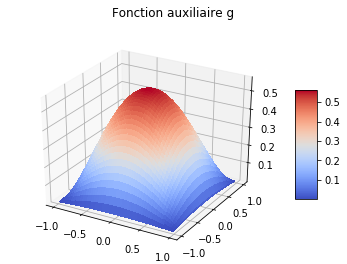

In [7]:
theta = 2
x = np.arange(-.99,.99,.01)
y = np.arange(-.99,.99,.01)
X, Y = np.meshgrid(x, y, indexing='ij')
Z = np.zeros(X.shape)
for i in range(len(x)):
    for j in range(len(y)):
        Z[i,j] = g(np.array([[x[i], y[j]]]), theta)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
fig.suptitle("Fonction auxiliaire g")
plt.show()

On admet par la suite que si les $(Y_k)$ sont i.i.d. et suivent une loi beta de paramètre $(\theta, \theta)$, alors $g_\theta$ est la densité de $(2Y_k-1, k = 1,\ldots, d)$. Ainsi, pour générer une variable aléatoire de densité $g_\theta$, il suffit de savoir générer des variables aléatoires suivant la loi beta, ce que fait la fonction ``np.random.beta``.



<p class="bg-primary" style="padding:1em">**QUESTION IV.2.5.** Complétez le script suivant puis utilisez-le pour tracer la performance (estimation, écart relatif et erreur relative) de l'estimateur par échantillonnage préférentiel pour $N = 10^5$, $d \in [2,20]$ et $\theta = 7,5$. Comparez avec IIDMC. Que pensez-vous des résultats obtenus ? Analysez notamment l'influence du paramètre $\theta$.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION IV.2.5.** 

Avec un grand $\theta$, on a une forte erreur relative en petite dimension et une erreur très forte à haute dimension (c'est l'inverse de Monte-Carlo). De plus, la minimisation de l'erreur relative ne peut se faire qu'à theta fixé.

En modifiant $\theta$, on peut jouer sur la localisation du minimum de l'erreur relative en fonction de la dimension. 

</div>

In [8]:
def estimation_IS(dimension, taille_echantillon, theta):
    
    random_matrix = 2*np.random.beta(theta,theta,size=(taille_echantillon,dimension))-1
    echantillon = np.multiply((np.linalg.norm(random_matrix,2, axis=1)<=1),np.reciprocal(g(random_matrix,theta)))
    estimation = 1/taille_echantillon*np.sum(echantillon)
    ecart_relatif = np.sqrt(np.var(echantillon)/taille_echantillon)
    erreur_relative = ecart_relatif/estimation
    
    return [estimation, ecart_relatif, erreur_relative]

In [9]:
N = 10**5
dimensions = range(2,21)
est_IS = np.zeros([len(dimensions),3])
theta = 10
val_th = np.zeros([len(dimensions),1])
for i in range(len(dimensions)):
    print("Estimation par échantillonnage préférentiel en dimension ",dimensions[i])
    est_IS[i,:] = estimation_IS(dimensions[i],N,theta)
    val_th[i] = np.pi**(dimensions[i]/2) / special.gamma(dimensions[i]/2+1)

Estimation par échantillonnage préférentiel en dimension  2
Estimation par échantillonnage préférentiel en dimension  3
Estimation par échantillonnage préférentiel en dimension  4
Estimation par échantillonnage préférentiel en dimension  5
Estimation par échantillonnage préférentiel en dimension  6
Estimation par échantillonnage préférentiel en dimension  7
Estimation par échantillonnage préférentiel en dimension  8
Estimation par échantillonnage préférentiel en dimension  9
Estimation par échantillonnage préférentiel en dimension  10
Estimation par échantillonnage préférentiel en dimension  11
Estimation par échantillonnage préférentiel en dimension  12
Estimation par échantillonnage préférentiel en dimension  13
Estimation par échantillonnage préférentiel en dimension  14
Estimation par échantillonnage préférentiel en dimension  15
Estimation par échantillonnage préférentiel en dimension  16
Estimation par échantillonnage préférentiel en dimension  17
Estimation par échantillonnage p

Text(0.5,0.98,'Erreur relative')

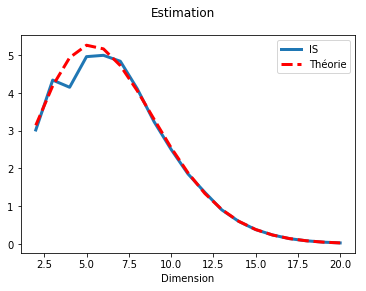

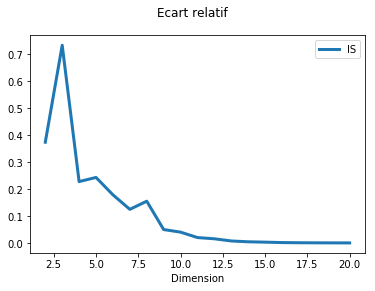

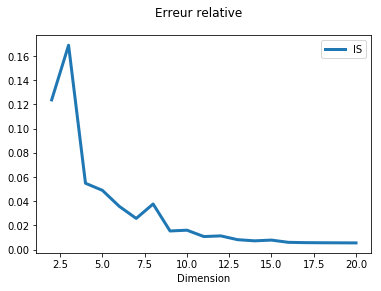

In [10]:
fig = plt.figure()
plt.plot(dimensions, est_IS[:,0], label="IS")
plt.plot(dimensions, val_th, 'r--', label="Théorie")
plt.legend()
plt.xlabel("Dimension")
fig.suptitle("Estimation")

fig = plt.figure()
plt.plot(dimensions, est_IS[:,1], label="IS")
plt.legend()
plt.xlabel("Dimension")
fig.suptitle("Ecart relatif")

fig = plt.figure()
plt.plot(dimensions, est_IS[:,2], label="IS")
plt.legend()
plt.xlabel("Dimension")
fig.suptitle("Erreur relative")

<p class="bg-primary" style="padding:1em">**QUESTION IV.2.6.** On cherche maintenant à comprendre l'influence de $\theta$. On fixe $N = 10^5$ et $d = 30$: tracez l'évolution de $\widehat V^{\text{IS}(\theta)}_d$, de l'écart relatif et de l'erreur relative correspondant pour $\theta \in [1,30]$ et discutez les résultats.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION IV.2.6.** 
Pour theta trop faible on est proche des valeurs d'erreur observées avec Monte-Carlo. A theta trop grand, on se concentre trop vers le centre de la sphère, et l'estimation est moins bonne que pour un theta "moyen" autour de 15.

</div>

In [11]:
N = 10**5
d = 30
theta = np.arange(5,30,1)
est_IS = np.zeros([len(theta),3])
for i in range(len(theta)):
    est_IS[i,:] = estimation_IS(30,N,theta[i])

Text(0.5,0.98,'Erreur relative')

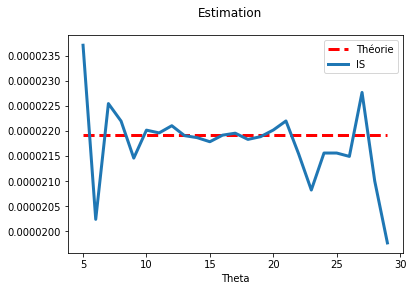

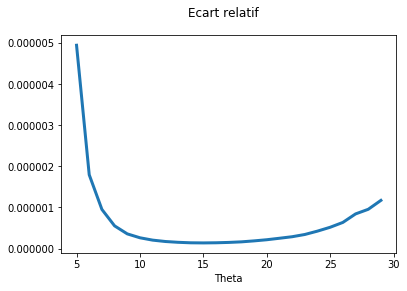

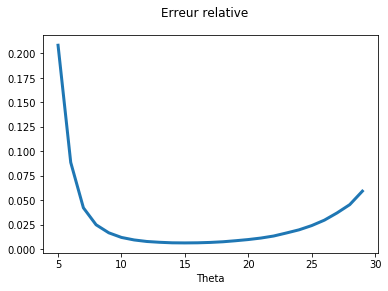

In [12]:
fig = plt.figure()
th = np.zeros([len(theta),1]) + np.pi**(d/2) / special.gamma(d/2+1)
plt.plot(theta, th, 'r--', label="Théorie")
plt.plot(theta, est_IS[:,0], label="IS")
plt.legend()
plt.xlabel("Theta")
fig.suptitle("Estimation")

fig = plt.figure()
plt.plot(theta, est_IS[:,1])
plt.xlabel("Theta")
fig.suptitle("Ecart relatif")

fig = plt.figure()
plt.plot(theta, est_IS[:,2])
plt.xlabel("Theta")
fig.suptitle("Erreur relative")

<p class="bg-primary" style="padding:1em">**QUESTION IV.2.7.** Pour $N = 10^5$ et $d = 30$, déterminez numériquement le paramètre $\theta_{\text{opt}}$ qui minimise l'erreur relative de $\widehat V_d^{\text{IS}(\theta)}$. Estimez l'erreur relative de $\widehat V_d^{\text{IS}(\theta_{\text{opt}})}$ et estimez le budget de simulation nécessaire pour déterminer $\theta_{\text{opt}}$. Evaluez le nombre d'échantillons nécessaires pour obtenir la même erreur relative que $\widehat V_d^{\text{IS}(\theta_{\text{opt}})}$ par IIDMC. Enfin, étudiez également l'influence de $N$ sur la procédure d'optimisation. </p>

<div class="alert alert-warning">**REPONSE A LA QUESTION IV.2.7.**



</div>



In [13]:
def optim_var_IS(theta):
    vol_estim = estimation_IS(30, 10**4, theta)
    return vol_estim[2]

In [14]:
N = 10**4
d=30
x0 = 15
res_optim = minimize(optim_var_IS, x0, method='nelder-mead',options={'xtol': 1e-5, 'disp': True})
N_tot_IS = res_optim.nit*N
vol_estim = estimation_IS(30, 10**5, res_optim.x)
print("Volume estimé par échantillonnage préférentiel optimisé:",vol_estim[0])
print("avec un theta optimisé de",res_optim.x,"erreur relative de ",vol_estim[2]," pour un budget de simulations de",N_tot_IS+10**5)
th =np.pi**(d/2) / special.gamma(d/2+1)
taille_MC = 1/vol_estim[2]**2 / th*2**d
print("Nombre d'échantillons Monte-Carlo nécessaires pour obtenir une précision équivalente à IS:",taille_MC)


Optimization terminated successfully.
         Current function value: 0.019287
         Iterations: 25
         Function evaluations: 64
Volume estimé par échantillonnage préférentiel optimisé: 2.1948125670909938e-05
avec un theta optimisé de [14.6015625] erreur relative de  0.006268221685668103  pour un budget de simulations de 350000
Nombre d'échantillons Monte-Carlo nécessaires pour obtenir une précision équivalente à IS: 1.2469892095563105e+18


<h2> IV.3. Echantillonnage préférentiel adaptatif par minimisation de l'entropie croisée</h2>

L'erreur relative de $\widehat V_d^{\text{IS}(\theta)}$ n'est en général pas une fonction convexe de $\theta$.  L'approche naïve de recherche du paramètre $\theta$ proposée en IV.2.7 ne converge plus et même des algorithmes d'optimisation plus performants ne sont pas toujours adaptés, notamment lorsque le nombre d'échantillons disponible est limité. La technique de minimisation de l'entropie croisée est une approche pour résoudre ces problèmes.

La divergence de Kullback-Leibler, aussi appelée entropie relative, caractérise la dissimilarité entre deux distributions de probabilités. Si $g$ est absolument continue par rapport à $f$, i.e., $g(x) = 0 \Rightarrow f(x) = 0$, alors l'entropie relative entre $f$ et $g$ est donnée par
$$ {\cal D}(f,g)=\int f \log(f/g) = \int f(x) \log\left( \frac{f(x)}{g(x)}\right) d x. $$
L'entropie relative satisfait les deux propriétés suivantes :
1. ${\cal D}(f,g)\geq 0$;
2. ${\cal D}(f,g)=0$ si et seulement si $f=g$;

qui font que ${\cal D}(f,g)$ donne une notion de distance entre $f$ et $g$. Dans le contexte précédent d'échantillonnage préférentiel, la technique de minimisation de l'entropie croisée consiste à déterminer $\theta_{\text{optCE}}$ qui minimise ${\cal D}(g_{\text{opt}},g_\theta)$.



<p class="bg-primary" style="padding:1em">**QUESTION IV.3.1.** Montrez que
$$ \arg \min_\theta {\cal D}(g_{\text{opt}}, g_\theta) = \arg \max_\theta \int f \phi \log g_\theta $$
et déduisez-en que, bien que $g_{\text{opt}}$ ne soit pas calculable, le problème d'optimisation l'est.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION IV.3.1.** </div>

<p class="bg-primary" style="padding:1em">**QUESTION IV.3.2.** Proposez une estimation de la fonction objectif du problème d'optimisation précédent par méthode de Monte-Carlo. Que vaut numériquement l'estimation par IIDMC de cette espérance dans le cas de l'estimation du volume d'une sphère en dimension 30?</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION IV.3.2.** </div>

In [ ]:
# TO DO

<p class="bg-primary" style="padding:1em">**QUESTION IV.3.3.** Cette espérance est donc estimée par échantillonnage préférentiel en pratique. La fonction ``estimation_IS_entropie_croisee`` propose une implémentation de l'algorithme d'échantillonnage préférentiel adaptatif par minimisation de l'entropie croisée pour l'estimation du volume d'une sphère de dimension $30$. Analysez les différentes étapes de cette fonction. Que vaut $\phi$ au cours de l'algorithme? Pourquoi faire varier $\phi$? Quel est l'influence attendue du paramètre $\rho$? 
Tracer l'évolution de l'estimation du volume et de son erreur relative obtenue par entropie croisée en fonction de la dimension.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION IV.3.3.** </div>

In [ ]:
def estimation_IS_entropie_croisee(dimension, taille_echantillon, rho):
    vol_th = np.pi**(dimension/2) / special.gamma(dimension/2+1)
    theta0=1   
    echantillon = 2 * np.random.beta(a=theta0,b=theta0,size=(taille_echantillon, dimension))-1
    x=g(echantillon, theta0)
    x.astype('float_')
    estimation = np.mean(np.multiply(np.linalg.norm(echantillon, 2, axis=1) < 1, np.reciprocal(x)))
    dist=np.linalg.norm(echantillon, 2, axis=1)
    S = np.percentile(dist,(1-rho)*100)
    newtheta = theta0;
    
    while(S>1):
        fmin = lambda theta: --np.sum(np.multiply(np.multiply(np.linalg.norm(echantillon, 2, axis=1) < S, np.reciprocal(x)),np.log(g(echantillon, theta))))
        newtheta=fminbound(fmin,1,30)
        echantillon = 2 * np.random.beta(a=newtheta,b=newtheta,size=(taille_echantillon, dimension))-1
        x=g(echantillon, newtheta)
        dist=np.linalg.norm(echantillon, 2, axis=1)
        S = np.percentile(dist,(1-rho)*100)

    estimation = np.mean(np.multiply(np.linalg.norm(echantillon, 2, axis=1) < 1, np.reciprocal(x)))    
    ecart_relatif = (estimation - vol_th) / vol_th
    ecart_type = np.sqrt(np.var(np.multiply(np.linalg.norm(echantillon, 2, axis=1) < 1, np.reciprocal(x)))/taille_echantillon)
    erreur_relative=  ecart_type / estimation
    return [estimation, ecart_relatif, erreur_relative]

In [ ]:
est_IS =estimation_IS_entropie_croisee(30, 10**4,0.8)
print(est_IS)

<p class="bg-primary" style="padding:1em">**QUESTION IV.3.4.** Déterminer numériquement le paramètre $\theta_{\text{optCE}}$ qui minimise ${\cal D}(g_{\text{optCE}},g_\theta)$. Estimez l'erreur relative de $\widehat V_d^{\text{IS}(\theta_{\text{optCE}})}$ et évaluez le budget de simulation nécessaire pour déterminer $\theta_{\text{optCE}}$. Evaluez le nombre d'échantillons IIDMC nécessaires pour obtenir la même erreur relative qu'avec  $\widehat V_d^{\text{IS}(\theta_{\text{optCE}})}$.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION IV.3.4.** </div>

In [ ]:
def estimation_IS_entropie_croisee_bud(dimension, taille_echantillon, rho):
    ###fonction équivalente à estimation_IS_entropie_croisee, elle renvoie en plus le nombre d'échantillons générées dans l'algorithme
    
    vol_th = np.pi**(dimension/2) / special.gamma(dimension/2+1)
    theta0=1   
    echantillon = 2 * np.random.beta(a=theta0,b=theta0,size=(taille_echantillon, dimension))-1
    budget=taille_echantillon
    x=g(echantillon, theta0)
    x.astype('float_')
    estimation = np.mean(np.multiply(np.linalg.norm(echantillon, 2, axis=1) < 1, np.reciprocal(x)))
    dist=np.linalg.norm(echantillon, 2, axis=1)
    S = np.percentile(dist,(1-rho)*100)
    newtheta = theta0;
    
    while(S>1):
        fmin = lambda theta: --np.sum(np.multiply(np.multiply(np.linalg.norm(echantillon, 2, axis=1) < S, np.reciprocal(x)),np.log(g(echantillon, theta))))
        newtheta=fminbound(fmin,1,30)
        echantillon = 2 * np.random.beta(a=newtheta,b=newtheta,size=(taille_echantillon, dimension))-1
        budget=budget+taille_echantillon
        x=g(echantillon, newtheta)
        dist=np.linalg.norm(echantillon, 2, axis=1)
        S = np.percentile(dist,(1-rho)*100)

    estimation = np.mean(np.multiply(np.linalg.norm(echantillon, 2, axis=1) < 1, np.reciprocal(x)))    
    ecart_relatif = (estimation - vol_th) / vol_th
    ecart_type = np.sqrt(np.var(np.multiply(np.linalg.norm(echantillon, 2, axis=1) < 1, np.reciprocal(x)))/taille_echantillon)
    erreur_relative=  ecart_type / estimation
    return [estimation, ecart_relatif, erreur_relative, budget, newtheta]

In [ ]:
N = 10**4
d=30
est_IS =estimation_IS_entropie_croisee_bud(30, 10**4,0.8)
N_tot_IS=est_IS[3]
print("Volume estimé par importance sampling optimisé par CE:",est_IS[0])
print("avec un theta optimisé de",est_IS[4],"erreur relative de ",est_IS[2]," pour un budget de simulations de",est_IS[3])

th =np.pi**(d/2) / special.gamma(d/2+1)
taille_MC=1/est_IS[2]**2 / th*2**d
print("Nombre d\'échantillons Monte-Carlo nécessaires pour obtenir une précision équivalente à IS:",taille_MC)

In [1]:
%matplotlib inline

import numpy as np
import sys
from scipy import special, stats
from scipy.optimize import minimize, fminbound
import random
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import pickle

matplotlib.rcParams['figure.figsize'] = (15,10)
matplotlib.rcParams['font.size'] = 22
matplotlib.rcParams['legend.handlelength'] = 2
matplotlib.rcParams['lines.linewidth'] = 3

<div class="alert alert-danger"><b>Ce notebook est à remplir au fur et à mesure du cours et constituera votre rapport sur les trois premières journées de cours. Les questions entourées du symbole $\star$ sont à traiter en dehors du cours.</b></div>

<h1 class="text-center">EISC-211 : Méthodes de Monte-Carlo</h1>

- [I. Calcul du volume d'une sphère par la méthode de Riemann](#RIEMANN)
- [II. Introduction à la méthode de Monte-Carlo : le cas IID](#MC)
- [III. Eléments de simulation stochastique et méthode du rejet](#SIMUSTO)
- [IV. Méthodes de réduction de variance](#IS)
- [V. Introduction aux chaînes de Markov](#INTROMARKOV)
- [VI. Méthodes de Monte-Carlo à base de chaînes de Markov](#MCMC)
- [VII. Chemins auto-évitants](#SAW)







<a id="INTROMARKOV"></a><h1 style="border: 5px solid; text-align: center; padding: 10px">V. Introduction aux chaînes de Markov</h1>

<h2> V.1. Vitesse(s) de convergence(s)</h2>

<p class="bg-primary" style="padding:1em">**QUESTION V.1.1.** Le script suivant génère une suite $(X_t)$ : quelles sont les valeurs prises par cette suite ? Expliquez simplement sa dynamique.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION V.1.1.**
Les valeurs prises par la suite sont 0 et 1. La dynamique est telle que : la $X_{t+1}$ prend la valeur $X_t$ avec une probabilité p et $(1 - X_t)$ avec une probabilité (1 - p).
</div>



In [2]:
def Markov_intro(t_max, p, init):
    X = np.zeros(t_max)
    X[0] = init
    for time in range(1, t_max):
        if (np.random.random() < p):
            X[time] = X[time-1];
        else:
            X[time] = 1 - X[time-1];
    return X



<div class="alert alert-success" style="text-align: center;"> On dit qu'une suite $(Y_n)$ satisfait le **théorème ergodique** si la suite $(\bar Y_N)$ des moyennes empirique converge presque sûrement vers une constante, i.e., s'il existe une constante $\mu$ telle que $\displaystyle \bar Y_N = \frac{1}{N} \sum_{k=1}^N Y_k \stackrel{\text{p.s.}}{\to} \mu. $ </div>


<p class="bg-primary" style="padding:1em">**QUESTION V.1.2.** Une suite i.i.d. satisfait-elle le théorème ergodique ? Justifiez votre réponse.

</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION V.1.2.**

Si la suite est i.i.d. elle tend vers l'espérance de Y par la loi des grands nombres. L'espérance étant constante, la suite i.i.d. satisfait le théorème ergodique.</div>



<p class="bg-primary" style="padding:1em">**QUESTION V.1.3.** Utilisez le script suivant pour vérifier que $(X_t)$ satisfait le théorème ergodique. Pour quelles valeurs de $p$ la convergence est-elle la plus rapide ? La condition initiale joue-t-elle un rôle ? Expliquez pourquoi.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION V.1.3.**
La convergence est la plus rapide pour p = 0.1 car on va très peu bouger par rapport à la position initiale.
</div>



Text(0,0.5,'Moyenne empirique')

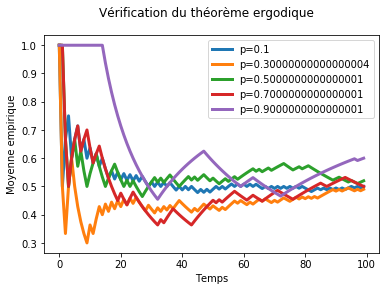

In [3]:
t_max = 10**2
val_p = np.arange(.1,1,.2)
nb_p = len(val_p)

fig, ax = plt.subplots()
for i in range(nb_p):
    p = val_p[i]
    traj = Markov_intro(t_max, p, 1)
    ax.plot(range(t_max), np.divide(np.cumsum(traj), range(1,1+len(traj))), label="p="+str(p))
plt.legend()
plt.suptitle("Vérification du théorème ergodique")
plt.xlabel("Temps")
plt.ylabel("Moyenne empirique")



<p class="bg-primary" style="padding:1em">**QUESTION V.1.4.** Pour quelle(s) valeur(s) de $p$ la suite $(X_t)$ est-elle i.i.d.? Concluez.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION V.1.4.** 

La suite $(X_t)$ sera i.i.d. pour $ p = 0.5 $ car c'est la seule manière d'avoir une distribution stationnaire : $(X_t)$ et $(X_{t+1})$ ont même loi.

</div>




<div class="alert alert-success" style="text-align: center;"> On rappelle qu'une suite $(Y_n)$ de variables aléatoires à valeurs entières converge en loi vers une variable aléatoire $Y_\infty$, ce que l'on note $Y_n \stackrel{\text{L}}{\to} Y_\infty$, si $P(Y_n = k) \to P(Y_\infty = k)$ pour tout $k \in N$. </div>





<p class="bg-primary" style="padding:1em">**QUESTION V.1.5.** Proposez une méthode numérique pour vérifier que $X_n \stackrel{\text{L}}{\to} X_\infty$.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION V.1.5.** 

On peut générer plusieurs chaînes de Markov de même probabilité, et en calculant la moyenne statistique d'une chaîne on peut estimer la probabilité de $X_\infty$ et donc sa loi.

</div>



<p class="bg-primary" style="padding:1em">**QUESTION V.1.6.** Complétez le script suivant pour vérifier numériquement que $X_n \stackrel{\text{L}}{\to} X_\infty$: quelle est la limite ? dépend-elle de $p$? Expliquez comment jouer sur la condition initiale pour que la chaîne de Markov démarre directement à l'équilibre.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION V.1.6.** 

La limite vaut $ \displaystyle \frac{1}{2} $ et est indépendante de $p$. Pour que la chaîne de Markov démarre directement à l'équilibre, il suffit de prendre comme condition initiale : $ P(X_0 = 0) = P(X_0 = 1) = 0.5 $

</div>



Text(0,0.5,'Estimation de la loi')

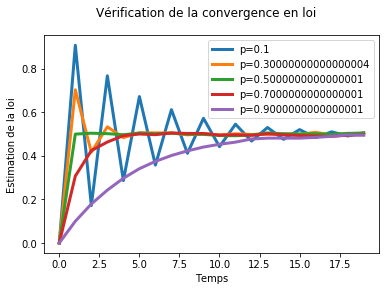

In [4]:
t_max = 2*10**1
taille_echantillon = 10**4
val_p = np.arange(.1,1,.2)
nb_p = len(val_p)

fig, ax = plt.subplots()
for i in range(nb_p):
    p = val_p[i]
    echantillon = np.zeros((taille_echantillon, t_max))
    for j in range(taille_echantillon):
        echantillon[j,:] = Markov_intro(t_max, p, 0)
    estimation_loi = np.sum(echantillon,axis=0)/taille_echantillon
    ax.plot(range(t_max), estimation_loi, label="p="+str(p))
plt.legend()
plt.suptitle("Vérification de la convergence en loi")
plt.xlabel("Temps")
plt.ylabel("Estimation de la loi")


<p class="bg-primary" style="padding:1em">**QUESTION V.1.7.** Pour quelles valeurs de $p$ la convergence est-elle la plus rapide ? Comparez à la réponse de la question V.1.3 et commentez.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION V.1.7.**

La convergence est la plus rapide pour $ p = 0.5 $. La différence avec la question V.1.3 c'est qu'on effectue la moyenne statistique sur plusieurs chaînes de probailité à un temps donné. Ici, l'intérêt est donc de tendre rapidement vers une position moyenne (avec $p=0.5$), contrairement à la question V.1.3 où l'intérêt était de ne "pas bouger" (avec $p=0.1$).

</div>


<p class="bg-primary" style="padding:1em">**QUESTION V.1.8.** Vérifiez numériquement que $\displaystyle \sqrt N \left( \bar X_N - \frac{1}{2} \right)$ suit approximativement une loi normale pour $N$ grand et faites le lien avec le théorème central limite</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION V.1.8.** 

On voit bien sur l'histogramme que $ \sqrt N \left( \bar X_N - \frac{1}{2} \right)$ suit une loi normale, ce qui est en accord avec le théorème central limite.

</div>



Text(0.5,0.98,'Vérification du théorème central limite')

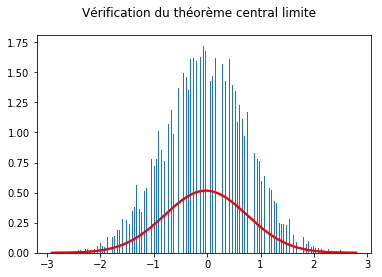

In [13]:
t_max = 10**3
taille_echantillon = 10**4

fig, ax = plt.subplots()
p = .707
echantillon = np.zeros(taille_echantillon)
arr = np.zeros((taille_echantillon, t_max))
for j in range(taille_echantillon):
    echantillon[j] = np.sqrt(t_max) * (np.mean(Markov_intro(t_max,p,0)) - 0.5)
binwidth = 100/taille_echantillon
# count, bins, ignored = plt.hist(echantillon, normed=True)
count, bins, ignored = plt.hist(echantillon, normed=True, bins=np.arange(min(echantillon), max(echantillon) + binwidth, binwidth))
sigma = np.std(echantillon)
mu = np.mean(echantillon)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
ax.plot(bins, stats.norm.pdf(bins, loc=mu, scale=sigma), linewidth=2, color='r')
plt.suptitle("Vérification du théorème central limite")


<h2> V.2. File d'attente</h2>


On considère la chaîne de Markov sur $N$ définie de la manière suivante : $X_{t+1} = F(X_t, U_t)$ avec
$$ F(x, u) = \begin{cases}
	x + (-1)^{{\bf 1}(u > p)} & \text{ si } x > 0,\\
	{\bf 1}(u \leq p) & \text{ si } x = 0.
\end{cases} $$




<p class="bg-primary" style="padding:1em">**QUESTION V.2.1.** Donnez la matrice de transition de cette chaîne de Markov.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION V.2.1.** 

$$
\begin{pmatrix}
1-p & p & 0 & 0 & ... \\
1-p & 0 & p & 0 & ... \\
0 & 1-p & 0 & p & ... \\
0 & 0 & 1-p & 0 & ... \\
\vdots & \vdots & \vdots & \vdots & \ddots \\
\end{pmatrix}
$$


</div>


<p class="bg-primary" style="padding:1em">**QUESTION V.2.2.** Complétez la fonction ``file_attente`` puis utilisez le script suivant pour tracer plusieurs trajectoires en fonction de $p$. Quel comportement observez-vous pour $p > 1/2$? Y a-t-il convergence ? Expliquez intuitivement pourquoi.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION V.2.2.** </div>



In [14]:
def file_attente(t_max, p, init):
    X = np.zeros(t_max)
    return X

Text(0,0.5,'X')

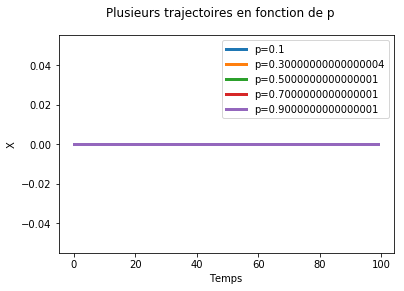

In [15]:
t_max = 10**2
val_p = np.arange(.1,1,.2)
nb_p = len(val_p)

fig, ax = plt.subplots()
for i in range(nb_p):
    p = val_p[i]
    traj = file_attente(t_max, p, 1)
    ax.plot(range(t_max), traj, label="p="+str(p))
plt.legend()
plt.suptitle("Plusieurs trajectoires en fonction de p")
plt.xlabel("Temps")
plt.ylabel("X")



<p class="bg-primary" style="padding:1em">**QUESTION V.2.3.** Complétez le script suivant pour montrer que pour $p < 1/2$, le théorème ergodique est satisfait. Vous pouvez utiliser la fonction `np.cumsum`.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION V.2.3.** </div>



In [16]:
t_max = 10**3
val_p = np.arange(.0,.7,.1)
nb_p = len(val_p)

fig, ax = plt.subplots()
for i in range(nb_p):
    p = val_p[i]
    traj = file_attente(t_max, p, 1)
    ax.plot(range(t_max), # TO DO, label="p="+str(p))
plt.legend()
plt.suptitle("Vérification du théorème ergodique")
plt.xlabel("Temps")
plt.ylabel("Moyenne empirique")

SyntaxError: invalid syntax (<ipython-input-16-94ad8da1a540>, line 11)


<p class="bg-primary" style="padding:1em">**QUESTION V.2.4.** Complétez le script suivant pour montrer que pour $p < 1/2$, $X_n$ converge en loi. Parmi la loi de Poisson et la loi géométrique, laquelle choisiriez-vous ?

<br> **Indication** Comment choisir le paramètre des lois que vous testez ?</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION V.2.3.** </div>



In [ ]:
t_max = 10**3
taille_echantillon = 10**4
nb_p = len(val_p)

fig, ax = plt.subplots()
p = .47
echantillon = np.zeros(taille_echantillon)
for j in range(taille_echantillon):
    echantillon[j] = file_attente(t_max, p, 0)[-1]
x = np.arange(np.min(echantillon)-1, np.max(echantillon)+1, .1)
par_poisson = # TO DO
par_geometrique = # TO DO
ax.step(x, stats.poisson.cdf(x, par_poisson), label="Poisson")
ax.step(x, stats.geom.cdf(x, par_geometrique, label="géométrique")
s, y = ecdf(echantillon)
ax.step(s, y, label="Empirique")
plt.legend()

<br>

<br>

<br>

<br>

<br>


<br>

<br>

<br>

<br>

<br>





<a id="MCMC"></a><h1 style="border: 5px solid; text-align: center; padding: 10px">VI. Méthodes de Monte-Carlo à base de chaînes de Markov</h1>






<div class="alert alert-success"> Si $(X_n)$ est une chaîne de Markov de mesure stationnaire $f$, alors le théorème ergodique pour les chaînes de Markov garantit que
$$ \displaystyle \widehat I^{\text{MCMC}} = \frac{1}{N} \sum_{k=1}^N \phi(X_k) $$
est un estimateur convergent de $\int \phi f$: on a remplacé un échantillon i.i.d. par la trajectoire d'un processus de Markov, on parle alors de méthode **MCMC** (par opposition à IIDMC). Cette méthode n'a d'intérêt que si l'on sait générer une chaîne de Markov avec une probabilité stationnaire donnée : l'**algorithme de Metropolis-Hastings** fait précisément cela, il s'agit de la pierre angulaire des méthodes MCMC.</div>



<h2> VI.1. Algorithme de Metropolis–Hastings</h2>

L'algorithme de Metropolis--Hastings est un algorithme général qui permet de générer une chaîne de Markov avec une distribution invariante donnée. Soit $\pi$ une mesure de probabilité sur un ensemble dénombrable $\mathfrak{X}$ et $K: \mathfrak{X} \times \mathfrak{X} \to [0,1]$ un noyau de transition, i.e., pour tout $x \in \mathfrak{X}$ la famille $K(x, \cdot) = (K(x,y), y \in \mathfrak{X})$ définit une mesure de probabilité sur $\mathfrak{X}$. L'algorithme de Metropolis-Hastings construit la chaîne de Markov suivante :
1. Tirer $Y_t$ selon la loi $K(X_t, \, \cdot)$;
2. Calculer
$$ \displaystyle \varrho(X_t, Y_t) = \min \left( 1, \frac{\pi(Y_t)}{\pi(X_t)} \frac{K(Y_t, X_t)}{K(X_t, Y_t)} \right); $$
3. Choisir $\displaystyle X_{t+1} = \begin{cases}
    Y_t & \text{ avec probabilité } \varrho(X_t, Y_t),\\
    X_t & \text{ avec probabilité } 1 - \varrho(X_t, Y_t).
\end{cases} $


<p class="bg-primary" style="padding:1em">**QUESTION VI.1.1.** Calculez $p_{xy} = P(X_2 = y \mid X_1 = x)$ puis montrez que $\pi_x p_{xy} = \pi_y p_{yx}$. Déduisez-en que $X$ admet $\pi$ comme probabilité stationnaire.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION VI.1.1.** 
<br>
<br>
$ 
p_{xy} = K(x,y)*\rho(x,y)
$

<br>
<br>
Supposons que $\pi_y*K(y,x) > \pi_x*K(x,y) $ <br>
<br> alors $p_{xy} = K(x,y)$ et $ p_{yx} = K(x,y)*\frac{\pi_x*K(x,y)}{\pi_y*K(y,x)} = \frac{\pi_x}{\pi_y}*K(x,y) = \frac{\pi_x}{\pi_y}*p_{xy} $

</div>



<p class="bg-primary" style="padding:1em">**QUESTION VI.1.2.** Décrivez simplement cet algorithme lorsque le noyau de transition ne dépend pas de l'état de départ, i.e., $K(x, \cdot \,) = k$ pour une certaine mesure de probabilité $k$, et tout $x \in \mathfrak{X}$. Faites le lien avec la méthode du rejet.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION VI.1.2.** 

On tire un $Y_k$ indépendant de $X_k$, on calcule $\rho(X_t,Y_t)$ puis on tire $X_{k+1}$ selon une loi de probabilité liée à $\rho(X_t,Y_t)$. Cela correspond à la méthode du rejet

</div>

<p class="bg-primary" style="padding:1em">**QUESTION VI.1.3.** Décrivez simplement $Y_t$ lorsque le noyau de transition est de la forme $K(x, y) = k(y-x)$.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION VI.1.3.** 

A chaque étape, on a $X_t$ fixé, ce qui impose une densité $K(X_t, . )$ selon laquelle on génère un $Y_t$. Ce dernier est tiré "proche" de $X_t$, et s'il est "suffisamment proche", on a $X_{t+1} = Y_t$.

</div>



<p class="bg-primary" style="padding:1em">**QUESTION VI.1.4.** Discutez des utilisations et avantages potentiels de l'algorithme de Metropolis-Hastings.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION VI.1.4.** 

Un des principaux avantages de cet algorithme est qu'il ne nécessite la connaissance de la densité cible $\pi$ qu'à une constante multiplicative près. On le voit donc bien utilisé en physique statistique notamment.

</div>




<div class="alert alert-success"> Dans le cas à densité, l'algorithme de Metropolis--Hastings est le même : un noyau de transition est une application $K: R^d \times R^d \to [0,1]$ telle que $K(x, \cdot \,)$ est une densité sur $R^d$ pour chaque $x \in R^d$, et $\pi$ est remplacée par une densité $f$ sur $R^d$. </div>




<h2> VI.2. Vitesse de convergence de la méthode MCMC</h2>


La méthode MCMC consiste donc à générer à l'aide de l'algorithme de Metropolis-Hastings une chaîne de Markov ayant une densité cible $f$ comme distribution stationnaire, puis de considérer l'estimateur
$$ \widehat I^{\text{MCMC}} = \frac{1}{N} \sum_{k=1}^N \phi(X_k) $$
qui est convergent par le théorème ergodique pour les chaînes de Markov.


<p class="bg-primary" style="padding:1em">**QUESTION VI.2.1.** A-t-on comme dans le cas IIDMC $\displaystyle \text{Var}(\widehat I^{\text{MCMC}}) = \frac{\text{Var}(\phi(X_1))}{\sqrt{N}}$? Pourquoi?</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION VI.2.1.** 

Les éléments d'une chaîne de Markov ne sont indépendants, des covariances apparaîtront donc dans la variance de l'estimateur.
On a alors: 
$$ Var(\widehat I^{\text {MCMC}}) = \frac{1}{N^2}(\sum_{k = 1}^N Var(\phi(X_k)) + 2 \sum_{k,l=1,k\neq l}^N Cov(\phi(X_k),\phi(X_l))) $$

</div>

<p class="bg-primary" style="padding:1em">**QUESTION VI.2.2.** Proposez une méthode numérique pour estimer $\text{Var}(\widehat I^{\text{MCMC}})$.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION VI.2.2.** 

On pourrait faire tourner l'algorithme à plusieurs reprises afin de créer un échantillon d'estimateur MCMC. Une estimation de la variance serait alors possible à l'aide de la variance empirique de cet échantillon.

</div>


<h2> VI.3. Méthode MCMC pour l’estimation du volume de la sphère</h2>


On retourne à l'exemple de la sphère. On propose quatre noyaux de transition :
* **Noyau uniforme - indépendant:** $K(x, \cdot \,)$ est la mesure uniforme sur $[-1,1]^d$;
* **Noyau uniforme - marche aléatoire:** $K(x, y) \propto {\bf 1}(\lVert y - x \rVert \leq \delta)$;
* **Noyau beta - indépendant:** $K(x, \cdot \,) = g_\theta$ avec $g_\theta$ introduit dans le BE sur l'échantillonnage préférentiel;
* **Noyau gaussien - marche aléatoire:** $K(x, y) \propto \exp \left( -\lVert y - x \rVert^2 / (2 \sigma^2) \right)$.


<p class="bg-primary" style="padding:1em">**QUESTION VI.3.1.** Décrivez par écrit l'algorithme de Metropolis-Hastings dans chacun des ces cas.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION VI.3.1.** </div>



<p class="bg-primary" style="padding:1em">**QUESTION VI.3.2.** Complétez les fonctions ``estimation_MCMC_XXX`` qui implantent ces algorithmes. Pour vérifier votre code, vous vérifierez numériquement et en petite dimension que ces quatre chaînes de Markov ont bien comme distribution stationnaire la mesure uniforme sur la sphère.</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION VI.3.2.** </div>



Text(0.5,0.98,'MCMC_gaussien')

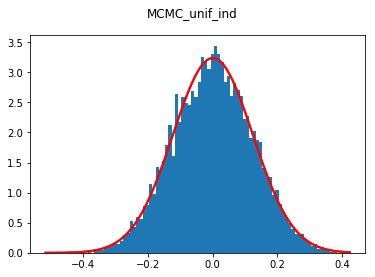

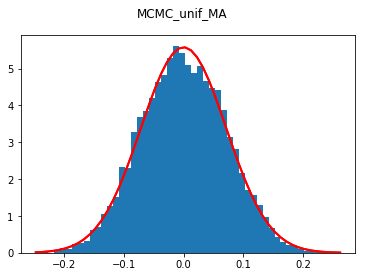

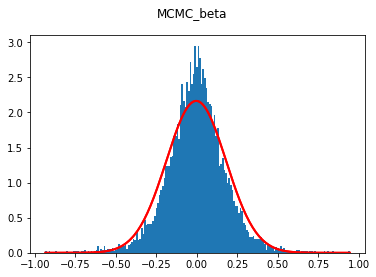

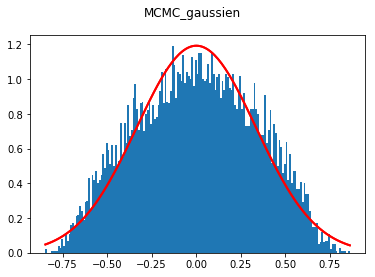

In [52]:
def gauss_tronquée(x):
    if not (-1 < np.linalg.norm(x,2,axis=0) < 1):
        return 0
    else:
        return np.exp(-np.linalg.norm(x,2,axis=0)**2/2)
    
def g(x, theta):
    '''
    x est une matrice avec N lignes et d colonnes
    d est la dimension de l'espace
    N est la taille de l'echantillon
    la fonction renvoie un vecteur de longueur N où la kième entrée correspond à la fonction g
    appliquée à la kième ligne
    '''
    dimension = x.shape[1]
    taille_echantillon = x.shape[0]
    c =(2 * special.gamma(2*theta) )/ (4**np.float64(theta) * special.gamma(theta)**2)
    return c**dimension * np.power(np.prod(1 - np.power(np.float64(x), 2), 1), (np.float64(theta) - 1))

def estimation_MCMC_unif_ind(init,t_max):
    d = len(init)
    X = np.zeros((d,t_max))
    X[:,0] = init
    Y = np.random.uniform(-1,1,size=(d,t_max))
    rho = np.zeros(t_max)
    
    for t in range (t_max-1) :
        if(0 < gauss_tronquée(X[:,t]) < 1):
            rho[t] = gauss_tronquée(Y[:,t])/gauss_tronquée(X[:,t])
        else :
            rho[t] = 1.
        test = np.random.uniform(0,1)
        if(test < rho[t]):
            X[:,t+1] = Y[:,t]
        else :
            X[:,t+1] = X[:,t]
    
    return np.mean(X[0,:])
    
def estimation_MCMC_unif_MA(init,t_max,delta):
    d = len(init)
    X = np.zeros((d,t_max))
    X[:,0] = init
    Y = np.zeros((d,t_max))
    rho = np.zeros(t_max)
    
    for t in range (t_max-1) :
        Y[:,t] = np.random.uniform(X[:,t]-delta,X[:,t]+delta)
        rho[t] = gauss_tronquée(Y[:,t])/gauss_tronquée(X[:,t])
        test = np.random.uniform(0,1)
        if(test < rho[t]):
            X[:,t+1] = Y[:,t]
        else :
            X[:,t+1] = X[:,t]
    return np.mean(X[0,:])

def estimation_MCMC_beta(init,t_max,theta):
    d = len(init)
    X = np.zeros((d,t_max))
    X[:,0] = init
    Y = 2*np.random.beta(theta,theta,size=(d,t_max))-1
    rho = np.zeros(t_max)
    
    for t in range (t_max-1) :
        X_t = np.transpose(X)
        Y_t = np.transpose(Y)
        
        rapp = g(X_t,theta)/g(Y_t,theta)
        
        rho[t] += gauss_tronquée(Y[:,t])/gauss_tronquée(X[:,t])*rapp[t]
        test = np.random.uniform(0,1)
        if(test < rho[t]):
            X[:,t+1] = Y[:,t]
        else :
            X[:,t+1] = X[:,t]
    return np.mean(X[0,:])

def estimation_MCMC_gaussien(init,t_max,sigma):
    d = len(init)
    X = np.zeros((d,t_max))
    X[:,0] = init
    Y = np.zeros((d,t_max))
    rho = np.zeros(t_max)
    
    for t in range (t_max-1) :
        Y[:,t] = stats.norm.rvs(loc=X[:,t],scale = sigma,size=d)
        
        rapp = stats.norm.pdf(X[:,t],loc=Y[:,t],scale = sigma)/stats.norm.pdf(Y[:,t],loc=X[:,t],scale=sigma)
        
        rho[t] += gauss_tronquée(Y[:,t])/gauss_tronquée(X[:,t])*rapp
        test = np.random.uniform(0,1)
        if(test < rho[t]):
            X[:,t+1] = Y[:,t]
        else :
            X[:,t+1] = X[:,t]
    return np.mean(X[0,:])
        
t_max = 2*10**1
taille_echantillon = 10**4

d = 1 ##in case we want to change dimension

delta = 0.05

theta = 2

sigma = 0.5
              
init = np.zeros(d)

fig, ax = plt.subplots()
echantillon = [ estimation_MCMC_unif_ind(init,t_max) for i in range(taille_echantillon)]

binwidth = 100/taille_echantillon
count, bins, ignored = plt.hist(echantillon, normed=True, bins=np.arange(min(echantillon), max(echantillon) + binwidth, binwidth))
sigma = np.std(echantillon)
mu = np.mean(echantillon)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
ax.plot(bins, stats.norm.pdf(bins, loc=mu, scale=sigma), linewidth=2, color='r')
plt.suptitle("MCMC_unif_ind")
        
fig, ax = plt.subplots()
echantillon = [ estimation_MCMC_unif_MA(init,t_max,delta) for i in range(taille_echantillon)]

binwidth = 100/taille_echantillon
count, bins, ignored = plt.hist(echantillon, normed=True, bins=np.arange(min(echantillon), max(echantillon) + binwidth, binwidth))
sigma = np.std(echantillon)
mu = np.mean(echantillon)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
ax.plot(bins, stats.norm.pdf(bins, loc=mu, scale=sigma), linewidth=2, color='r')
plt.suptitle("MCMC_unif_MA")

fig, ax = plt.subplots()
echantillon = [ estimation_MCMC_beta(init,t_max,theta) for i in range(taille_echantillon)]

binwidth = 100/taille_echantillon
count, bins, ignored = plt.hist(echantillon, normed=True, bins=np.arange(min(echantillon), max(echantillon) + binwidth, binwidth))
sigma = np.std(echantillon)
mu = np.mean(echantillon)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
ax.plot(bins, stats.norm.pdf(bins, loc=mu, scale=sigma), linewidth=2, color='r')
plt.suptitle("MCMC_beta")

fig, ax = plt.subplots()
echantillon = [ estimation_MCMC_gaussien(init,t_max,sigma) for i in range(taille_echantillon)]

binwidth = 100/taille_echantillon
count, bins, ignored = plt.hist(echantillon, normed=True, bins=np.arange(min(echantillon), max(echantillon) + binwidth, binwidth))
sigma = np.std(echantillon)
mu = np.mean(echantillon)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
ax.plot(bins, stats.norm.pdf(bins, loc=mu, scale=sigma), linewidth=2, color='r')
plt.suptitle("MCMC_gaussien")




<p class="bg-primary" style="padding:1em">**QUESTION VI.3.3.** Analysez la performance de ces quatre algorithmes : pour chaque algorithme, vous devrez notamment :
<br>
1. tracer l'évolution de l'écart relatif en fonction de la dimension, pour un budget de simulation et des valeurs de paramètres que vous aurez choisis;
<br>
2. discuter l'influence des paramètres (si le noyau en a);
<br>
3. discuter l'influence de la condition initiale $X_0$.
</p>

<div class="alert alert-warning">**REPONSE A LA QUESTION VI.3.3.** </div>